In [260]:
from google.colab import drive
drive.mount('/content/drive')
# connects to google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [261]:
!pip install gradio scikit-learn pandas matplotlib seaborn --quiet

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
import gradio as gr
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
#calls the data to bring in
df = pd.read_csv("/content/drive/MyDrive/DSP_461/diabetic_data.csv")
df.head()


encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

In [263]:
df.shape
#shape of the data -> 101766 rows and 50 columns

(101766, 50)

In [264]:
df.info()
#Info on variable in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [265]:
missing_counts = df.isna().sum()

print(missing_counts)
#counts the missing variables in dataset ->
#max_glu_serum is missing 96420
#A1Cresult is missing 84748

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [266]:
missing_percentage = df.isna().sum() / len(df) * 100
print(missing_percentage)
# missing in percentage
# max_glu_serum is missing %94.746772
# A1Cresult is missing %83.277322

encounter_id                 0.000000
patient_nbr                  0.000000
race                         0.000000
gender                       0.000000
age                          0.000000
weight                       0.000000
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                   0.000000
medical_specialty            0.000000
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.000000
diag_2                       0.000000
diag_3                       0.000000
number_diagnoses             0.000000
max_glu_serum               94.746772
A1Cresult                   83.277322
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [267]:
for column in df:
    print(f"Column: {column}")
    print(df[column].value_counts(normalize=True) * 100)  # multiply by 100 to get %
    print("-" * 50)
#perctenage of each varaible in each column

Column: encounter_id
encounter_id
443867222    0.000983
2278392      0.000983
149190       0.000983
64410        0.000983
500364       0.000983
               ...   
28236        0.000983
15738        0.000983
12522        0.000983
63768        0.000983
55842        0.000983
Name: proportion, Length: 101766, dtype: float64
--------------------------------------------------
Column: patient_nbr
patient_nbr
88785891     0.039306
43140906     0.027514
88227540     0.022601
1660293      0.022601
23199021     0.022601
               ...   
174477542    0.000983
38726739     0.000983
77391171     0.000983
89869032     0.000983
63555939     0.000983
Name: proportion, Length: 71518, dtype: float64
--------------------------------------------------
Column: race
race
Caucasian          74.778413
AfricanAmerican    18.876639
?                   2.233555
Hispanic            2.001651
Other               1.479866
Asian               0.629876
Name: proportion, dtype: float64
--------------------------

In [268]:
df_copy = df.copy()
#creating a copy of data

In [269]:
def drop_invalid_genders(df, gender_col='gender'):
    valid_genders = {'Male', 'Female'}
    return df[df[gender_col].isin(valid_genders)].copy()
# allows for only male and female to make life easier

In [270]:
df = drop_invalid_genders(df)


In [271]:
cols_to_drop = ['weight', 'payer_code', 'medical_specialty','admission_source_id',
                'admission_type_id','patient_nbr','num_lab_procedures','num_procedures',
                'num_medications','number_emergency', 'number_inpatient', 'number_outpatient',
                'max_glu_serum', 'A1Cresult','change',
                "encounter_id","readmitted",
                "metformin", "repaglinide", "nateglinide", "chlorpropamide",
                "glimepiride", "acetohexamide", "glipizide", "glyburide",
                "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose",
                "miglitol", "troglitazone", "tolazamide", "examide",
                "insulin", "glyburide-metformin",
                "glipizide-metformin", "glimepiride-pioglitazone",
                "metformin-rosiglitazone", "metformin-pioglitazone","citoglipton","diabetesMed",]

# Droping columns that i wont use
df_drop = df.drop(columns=[col for col in cols_to_drop if col in df.columns])
df_drop.head()


race  gender      age  discharge_disposition_id  \
0        Caucasian  Female   [0-10)                        25   
1        Caucasian  Female  [10-20)                         1   
2  AfricanAmerican  Female  [20-30)                         1   
3        Caucasian    Male  [30-40)                         1   
4        Caucasian    Male  [40-50)                         1   

   time_in_hospital  diag_1  diag_2 diag_3  number_diagnoses  
0                 1  250.83       ?      ?                 1  
1                 3     276  250.01    255                 9  
2                 2     648     250    V27                 6  
3                 2       8  250.43    403                 7  
4                 1     197     157    250                 5

In [272]:
for column in df_drop:
    print(df_drop[column].value_counts(1))
    print("-" * 50)
# percentage of each variable in each column

race
Caucasian          0.747806
AfricanAmerican    0.188772
?                  0.022317
Hispanic           0.020017
Other              0.014789
Asian              0.006299
Name: proportion, dtype: float64
--------------------------------------------------
gender
Female    0.537602
Male      0.462398
Name: proportion, dtype: float64
--------------------------------------------------
age
[70-80)     0.256144
[60-70)     0.220925
[50-60)     0.169570
[80-90)     0.168991
[40-50)     0.095172
[30-40)     0.037096
[90-100)    0.027446
[20-30)     0.016283
[10-20)     0.006790
[0-10)      0.001582
Name: proportion, dtype: float64
--------------------------------------------------
discharge_disposition_id
1     0.591885
3     0.137123
6     0.126785
18    0.036271
2     0.020911
22    0.019575
11    0.016136
5     0.011635
25    0.009719
4     0.008009
7     0.006122
23    0.004049
13    0.003921
14    0.003656
28    0.001366
8     0.001061
15    0.000619
24    0.000472
9     0.000206
17    

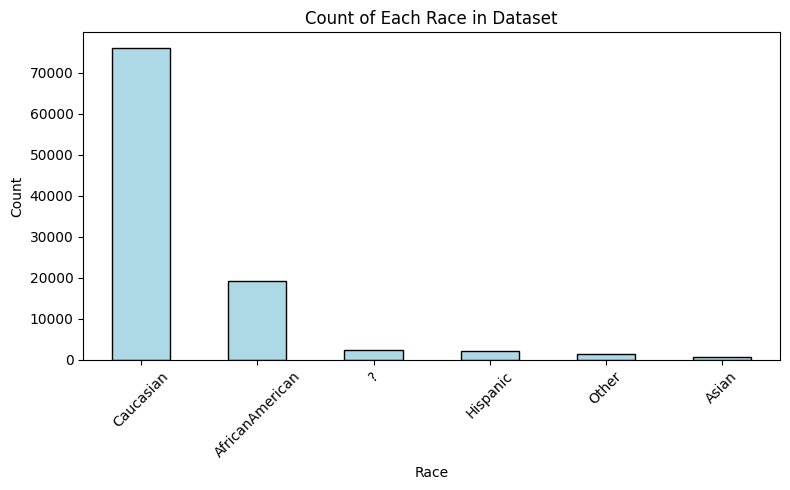

In [273]:
race_counts = df['race'].value_counts()

# bar graph from each race
plt.figure(figsize=(8, 5))
race_counts.plot(kind='bar', color='lightblue', edgecolor='black')

plt.title('Count of Each Race in Dataset')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

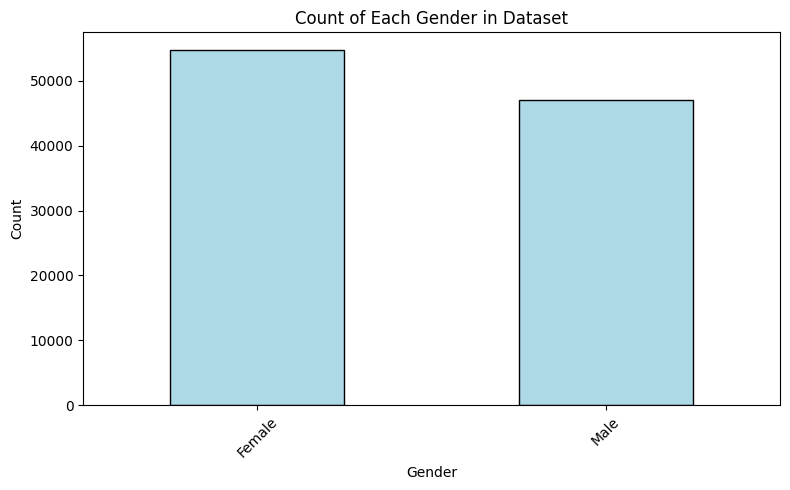

In [274]:
gender_counts = df['gender'].value_counts()

# bar graph for each gender
plt.figure(figsize=(8, 5))
gender_counts.plot(kind='bar', color='lightblue', edgecolor='black')

plt.title('Count of Each Gender in Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

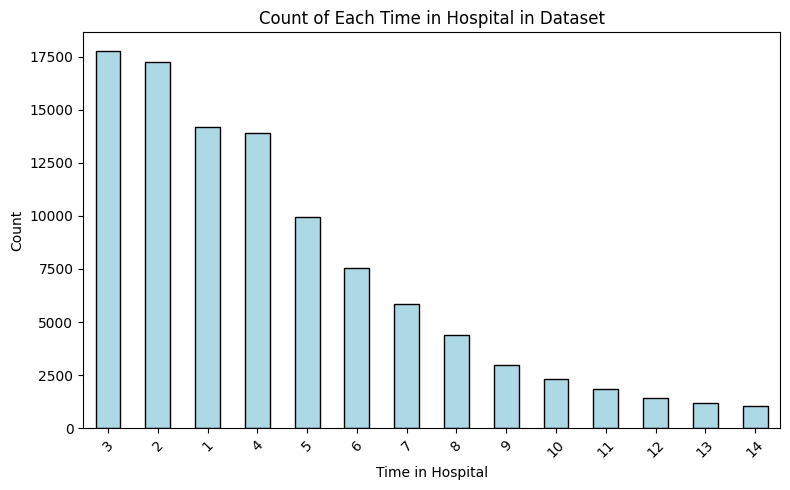

In [275]:
time_in_hospital_counts = df['time_in_hospital'].value_counts()

# bar graph to show how many times each length of hospital stay occurred
plt.figure(figsize=(8, 5))
time_in_hospital_counts.plot(kind='bar', color='lightblue', edgecolor='black')

plt.title('Count of Each Time in Hospital in Dataset')
plt.xlabel('Time in Hospital')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

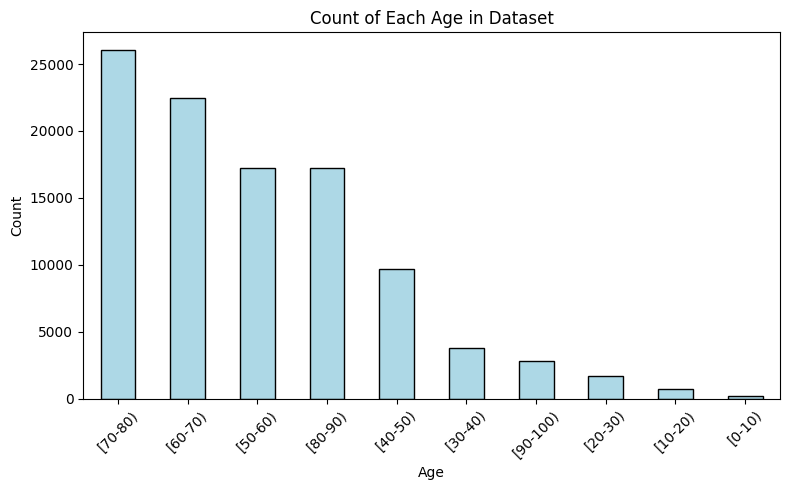

In [276]:
age_counts = df['age'].value_counts()

# bar graph for age distribution in data
plt.figure(figsize=(8, 5))
age_counts.plot(kind='bar', color='lightblue', edgecolor='black')

plt.title('Count of Each Age in Dataset')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

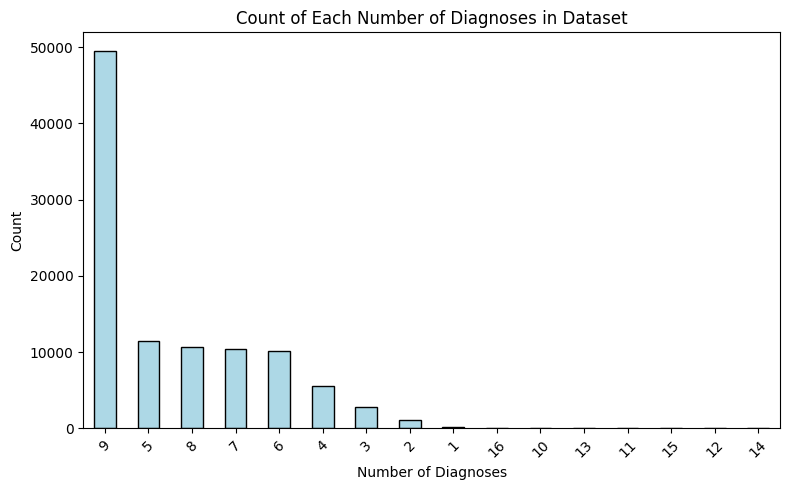

In [277]:
number_diagnoses_counts = df['number_diagnoses'].value_counts()

# bar graph for the number of diagnoses distribution in the data
plt.figure(figsize=(8, 5))
number_diagnoses_counts.plot(kind='bar', color='lightblue', edgecolor='black')

plt.title('Count of Each Number of Diagnoses in Dataset')
plt.xlabel('Number of Diagnoses')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [278]:
df_copy['admission_type_id'].value_counts()
#Value counts of each admission type
# 1 = emergency
# 2 = urgent
# 3 = elective
# 4 = newborn
# 5 = not available
# 6 = null
# 7 = trauma center
# 8 = not mapped

admission_type_id
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64

In [279]:
def translate_admission_type(admission_id):
    mapping = {
        1: 'Emergency',
        2: 'Urgent',
        3: 'Elective',
        4: 'Newborn',
        5: 'Not Available',
        6: 'Null',
        7: 'Trauma Center',
        8: 'Not Mapped'
    }
    return mapping.get(admission_id, 'Unknown')  # default if ID not in mapping

# Putting words to the numbers representing each admission type makes it easier to understand
df_drop['admission_type'] = df_copy['admission_type_id'].apply(translate_admission_type)
df_drop['admission_type'].value_counts()


admission_type
Emergency        53988
Elective         18868
Urgent           18480
Null              5291
Not Available     4785
Not Mapped         320
Trauma Center       21
Newborn             10
Name: count, dtype: int64

In [280]:
#Count of discharge type
df_drop['discharge_disposition_id'].value_counts()
# 1 = Discharged to home
# 2 = Discharged/transferred to another short term hospital
# 3 = Discharged/transferred to SNF (Skilled Nursing Facility)
# 4 = Discharged/transferred to ICF (# 4 = Discharged/transferred to)
# 5 = Discharged/transferred to another type of inpatient care institution
# 6 = Discharged/transferred to home with home health service
# 7 = Left AMA
# 8 = Discharged/transferred to home under care of Home IV provider
# 9 = Admitted as an inpatient to this hospital
# 10 = Neonate discharged to another hospital for neonatal aftercare
# 11 = Expired
# 12 = Still patient or expected to return for outpatient services
# 13 = Hospice / home
# 14 = Hospice / medical facility
# 15 = Discharged/transferred within this institution to Medicare approved swing bed
# 16 = Discharged/transferred/referred another institution for outpatient services
# 17 = Discharged/transferred/referred to this institution for outpatient services
# 18 = NULL
# 19 = Expired at home. Medicaid only, hospice.
# 20 = Expired in a medical facility. Medicaid only, hospice.
# 21 = Expired, place unknown. Medicaid only, hospice.
# 22 = Discharged/transferred to another rehab fac including rehab units of a hospital .
# 23 = Discharged/transferred to a long term care hospital.
# 24 = Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.
# 25 = Not Mapped
# 26 = Unknown/Invalid
# 27 = Discharged/transferred to a federal health care facility.
# 28 = Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital
# 29 = Discharged/transferred to a Critical Access Hospital (CAH).

discharge_disposition_id
1     60232
3     13954
6     12902
18     3691
2      2128
22     1992
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: count, dtype: int64

In [281]:
def translate_discharge_disposition(code):
    discharge_disposition_map = {
        1: 'Discharged to home',
        2: 'Discharged/transferred to another short term hospital',
        3: 'Discharged/transferred to SNF (Skilled Nursing Facility)',
        4: 'Discharged/transferred to ICF',
        5: 'Discharged/transferred to another type of inpatient care institution',
        6: 'Discharged/transferred to home with home health service',
        7: 'Left AMA (Against Medical Advice)',
        8: 'Discharged/transferred to home under care of Home IV provider',
        9: 'Admitted as an inpatient to this hospital',
        10: 'Neonate discharged to another hospital for neonatal aftercare',
        11: 'Expired',
        12: 'Still patient or expected to return for outpatient services',
        13: 'Hospice / home',
        14: 'Hospice / medical facility',
        15: 'Discharged/transferred within this institution to Medicare approved swing bed',
        16: 'Discharged/transferred/referred to another institution for outpatient services',
        17: 'Discharged/transferred/referred to this institution for outpatient services',
        18: 'NULL',
        19: 'Expired at home (Medicaid only, hospice)',
        20: 'Expired in a medical facility (Medicaid only, hospice)',
        21: 'Expired, place unknown (Medicaid only, hospice)',
        22: 'Discharged/transferred to another rehab facility (including rehab units of a hospital)',
        23: 'Discharged/transferred to a long term care hospital',
        24: 'Discharged/transferred to a Medicaid-certified nursing facility (not certified under Medicare)',
        25: 'Not Mapped',
        26: 'Unknown/Invalid',
        27: 'Discharged/transferred to a federal health care facility',
        28: 'Discharged/transferred/referred to a psychiatric hospital or unit',
        29: 'Discharged/transferred to a Critical Access Hospital (CAH)'
    }
    return discharge_disposition_map.get(code, 'Unknown')
#Translating discharge disposition into words
df_drop['discharge_disposition'] = df_drop['discharge_disposition_id'].apply(translate_discharge_disposition)
df_drop['discharge_disposition'].value_counts()



discharge_disposition
Discharged to home                                                                                60232
Discharged/transferred to SNF (Skilled Nursing Facility)                                          13954
Discharged/transferred to home with home health service                                           12902
NULL                                                                                               3691
Discharged/transferred to another short term hospital                                              2128
Discharged/transferred to another rehab facility (including rehab units of a hospital)             1992
Expired                                                                                            1642
Discharged/transferred to another type of inpatient care institution                               1184
Not Mapped                                                                                          989
Discharged/transferred to ICF                                                                       815
Left AMA (Against Medical Advice)                                                                   623
Discharged/transferred to a long term care hospital                                                 412
Hospice / home                                                                                      399
Hospice / medical facility                                                                          372
Discharged/transferred/referred to a psychiatric hospital or unit                                   139
Discharged/transferred to home under care of Home IV provider                                       108
Discharged/transferred within this institution to Medicare approved swing bed                        63
Discharged/transferred to a Medicaid-certified nursing facility (not certified under Medicare)       48
Admitted as an inpatient to this hospital                                                            21
Discharged/transferred/referred to this institution for outpatient services                          14
Discharged/transferred/referred to another institution for outpatient services                       11
Expired at home (Medicaid only, hospice)                                                              8
Neonate discharged to another hospital for neonatal aftercare                                         6
Discharged/transferred to a federal health care facility                                              5
Still patient or expected to return for outpatient services                                           3
Expired in a medical facility (Medicaid only, hospice)                                                2
Name: count, dtype: int64

In [282]:
df_copy['admission_source_id'].value_counts()
#Count of admission sources
# 1 = Physician Referral
# 2 = Clinic Referral
# 3 = HMO Referral
# 4 = Transfer from a hospital
# 5 = Transfer from a Skilled Nursing Facility (SNF)
# 6 = Transfer from another health care facility
# 7 = Emergency Room
# 8 = Court/Law Enforcement
# 9 = Not Available
# 10 = Transfer from critial access hospital
# 11 = Normal Delivery
# 12 = Premature Delivery
# 13 = Sick Baby
# 14 = Extramural Birth
# 15 = Not Available
# 17 = NULL
# 18 = Transfer From Another Home Health Agency
# 19 = Readmission to Same Home Health Agency
# 20 = Not Mapped
# 21 = Unknown/Invalid
# 22 = Transfer from hospital inpt/same fac reslt in a sep claim
# 23 = Born inside this hospital
# 24 = Born outside this hospital
# 25 = Transfer from Ambulatory Surgery Center
# 26 = Transfer from Hospice


admission_source_id
7     57494
1     29565
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
14        2
11        2
25        2
13        1
Name: count, dtype: int64

In [283]:
def translate_admission_source(code):
    admission_source_map = {
        1: 'Physician Referral',
        2: 'Clinic Referral',
        3: 'HMO Referral',
        4: 'Transfer from a hospital',
        5: 'Transfer from a Skilled Nursing Facility (SNF)',
        6: 'Transfer from another health care facility',
        7: 'Emergency Room',
        8: 'Court/Law Enforcement',
        9: 'Not Available',
        10: 'Transfer from Critical Access Hospital',
        11: 'Normal Delivery',
        12: 'Premature Delivery',
        13: 'Sick Baby',
        14: 'Extramural Birth',
        15: 'Not Available',          # duplicate code (kept same meaning)
        17: 'NULL',
        18: 'Transfer From Another Home Health Agency',
        19: 'Readmission to Same Home Health Agency',
        20: 'Not Mapped',
        21: 'Unknown/Invalid',
        22: 'Transfer from hospital inpatient/same facility resulting in separate claim',
        23: 'Born inside this hospital',
        24: 'Born outside this hospital',
        25: 'Transfer from Ambulatory Surgery Center',
        26: 'Transfer from Hospice'
    }
    return admission_source_map.get(code, 'Unknown')
  #Translating admission source numbers into words
df_copy['admission_source'] = df_copy['admission_source_id'].apply(translate_admission_source)
df_copy['admission_source'].value_counts()


admission_source
Emergency Room                                                                57494
Physician Referral                                                            29565
NULL                                                                           6781
Transfer from a hospital                                                       3187
Transfer from another health care facility                                     2264
Clinic Referral                                                                1104
Transfer from a Skilled Nursing Facility (SNF)                                  855
HMO Referral                                                                    187
Not Mapped                                                                      161
Not Available                                                                   125
Court/Law Enforcement                                                            16
Transfer from hospital inpatient/same facility resulting in separate claim       12
Transfer from Critical Access Hospital                                            8
Extramural Birth                                                                  2
Normal Delivery                                                                   2
Transfer from Ambulatory Surgery Center                                           2
Sick Baby                                                                         1
Name: count, dtype: int64

In [284]:
df_drop['diag_1'].value_counts()
#Count of Diagnosis 1

diag_1
428    6862
414    6580
786    4016
410    3614
486    3508
       ... 
833       1
391       1
690       1
10        1
V51       1
Name: count, Length: 717, dtype: int64

In [285]:
df_drop['diag_2'].value_counts()
#Count of Diagnosis 2

diag_2
276    6752
428    6662
250    6071
427    5036
401    3736
       ... 
123       1
884       1
V60       1
843       1
927       1
Name: count, Length: 749, dtype: int64

In [286]:
df_drop['diag_3'].value_counts()
#Count of Diagnosis 3

diag_3
250    11555
401     8288
276     5175
428     4577
427     3955
       ...  
14         1
750        1
370        1
671        1
971        1
Name: count, Length: 790, dtype: int64

Key from the study

1.   Group name	icd9 codes	Number of encounters	% of encounter	Description
2. Circulatory	390–459, 785	21,411	30.6%	Diseases of the circulatory system
3. Respiratory	460–519, 786	9,490	13.6%	Diseases of the respiratory system
4. Digestive	520–579, 787	6,485	9.3%	Diseases of the digestive system
5. Diabetes	250.xx	5,747	8.2%	Diabetes mellitus
6. Injury	800–999	4,697	6.7%	Injury and poisoning
7. Musculoskeletal	710–739	4,076	5.8%	Diseases of the musculoskeletal system and connective tissue
8. Genitourinary	580–629, 788	3,435	4.9%	Diseases of the genitourinary system
9. Neoplasms	140–239	2,536	3.6%	Neoplasms
10. Other (17.3%) 780, 781, 784, 790–799	2,136	3.1%	Other symptoms, signs, and ill-defined conditions
11. 240–279, without 250	1,851	2.6%	Endocrine, nutritional, and metabolic diseases and immunity disorders, without diabetes
12. 680–709, 782	1,846	2.6%	Diseases of the skin and subcutaneous tissue
13. 001–139	1,683	2.4%	Infectious and parasitic diseases
14. 290–319	1,544	2.2%	Mental disorders
15. E–V	918	1.3%	External causes of injury and supplemental classification
16. 280–289	652	0.9%	Diseases of the blood and blood-forming organs
17. 320–359	634	0.9%	Diseases of the nervous system
18. 630–679	586	0.8%	Complications of pregnancy, childbirth, and the puerperium
19. 360–389	216	0.3%	Diseases of the sense organs
20. 740–759	41	0.1%	Congenital anomalies




In [287]:
# Define mapping based on ICD-9 ranges
diagnosis_groups = [
    ("Circulatory", [(390, 459), (785, 785)]),
    ("Respiratory", [(460, 519), (786, 786)]),
    ("Digestive", [(520, 579), (787, 787)]),
    ("Diabetes", [(250, 250)]),
    ("Injury", [(800, 999)]),
    ("Musculoskeletal", [(710, 739)]),
    ("Genitourinary", [(580, 629), (788, 788)]),
    ("Neoplasms", [(140, 239)]),
    ("Other", [(780, 780), (781, 781), (784, 784), (790, 799)]),
    ("Endocrine_no_diabetes", [(240, 279)]),
    ("Skin", [(680, 709), (782, 782)]),
    ("Infectious", [(1, 139)]),
    ("Mental", [(290, 319)]),
    ("External", []),  # E and V codes
    ("Blood", [(280, 289)]),
    ("Nervous", [(320, 359)]),
    ("Pregnancy", [(630, 679)]),
    ("Sense_organs", [(360, 389)]),
    ("Congenital", [(740, 759)])
]


In [288]:
#Function to help with mapping the diagnosis codes to words
def map_icd9_to_group(code):
    if pd.isna(code):
        return np.nan
    code_str = str(code)

    # Handle 'E' or 'V' codes explicitly
    if code_str.startswith(("E", "V")):
        return "External"

    # Convert numeric part safely
    try:
        num = int(code_str.split('.')[0])  # e.g., 250.13 → 250
    except ValueError:
        return "Other"

    # Check each range
    for group, ranges in diagnosis_groups:
        for r in ranges:
            if r[0] <= num <= r[1]:
                return group

    return "Other"  # default if no match


In [289]:
# Translating the diagnosis codes to words
df_drop['dig_group_1'] = df_drop['diag_1'].apply(map_icd9_to_group)
df_drop['dig_group_1'].value_counts(dropna=False)

percentages = df_drop['dig_group_1'].value_counts(normalize=True, dropna=False) * 100

print(percentages)


dig_group_1
Circulatory              29.908709
Respiratory              14.173128
Digestive                 9.310850
Diabetes                  8.605289
Injury                    6.851213
Genitourinary             5.028350
Musculoskeletal           4.871122
Neoplasms                 3.373525
Other                     3.095428
Infectious                2.720046
Endocrine_no_diabetes     2.655189
Skin                      2.568714
Mental                    2.222812
External                  1.616501
Blood                     1.083891
Nervous                   0.930594
Pregnancy                 0.675098
Sense_organs              0.259426
Congenital                0.050116
Name: proportion, dtype: float64


In [290]:
# Translating the diagnosis codes to words
df_drop['dig_group_2'] = df_drop['diag_2'].apply(map_icd9_to_group)
df_drop['dig_group_2'].value_counts(dropna=False)

percentages = df_drop['dig_group_2'].value_counts(normalize=True, dropna=False) * 100

print(percentages)

dig_group_2
Circulatory              31.327693
Diabetes                 12.572349
Respiratory              10.706249
Genitourinary             8.230889
Endocrine_no_diabetes     8.080540
Digestive                 4.097757
Skin                      3.606419
Other                     3.104272
Blood                     2.875308
Mental                    2.610969
Neoplasms                 2.502874
External                  2.492065
Injury                    2.383971
Infectious                1.897546
Musculoskeletal           1.733439
Nervous                   1.106493
Pregnancy                 0.407810
Sense_organs              0.157228
Congenital                0.106129
Name: proportion, dtype: float64


In [291]:
# Translating the diagnosis codes to words
df_drop['dig_group_3'] = df_drop['diag_3'].apply(map_icd9_to_group)
df_drop['dig_group_3'].value_counts(dropna=False)

percentages = df_drop['dig_group_3'].value_counts(normalize=True, dropna=False) * 100

print(percentages)

dig_group_3
Circulatory              29.779979
Diabetes                 16.859762
Endocrine_no_diabetes     8.992463
Respiratory               7.230526
Genitourinary             6.564272
External                  4.969390
Other                     4.072207
Digestive                 3.861914
Mental                    3.081670
Skin                      2.561835
Blood                     2.446862
Injury                    1.911304
Musculoskeletal           1.881823
Infectious                1.828759
Neoplasms                 1.823846
Nervous                   1.476961
Pregnancy                 0.303647
Sense_organs              0.258444
Congenital                0.094337
Name: proportion, dtype: float64


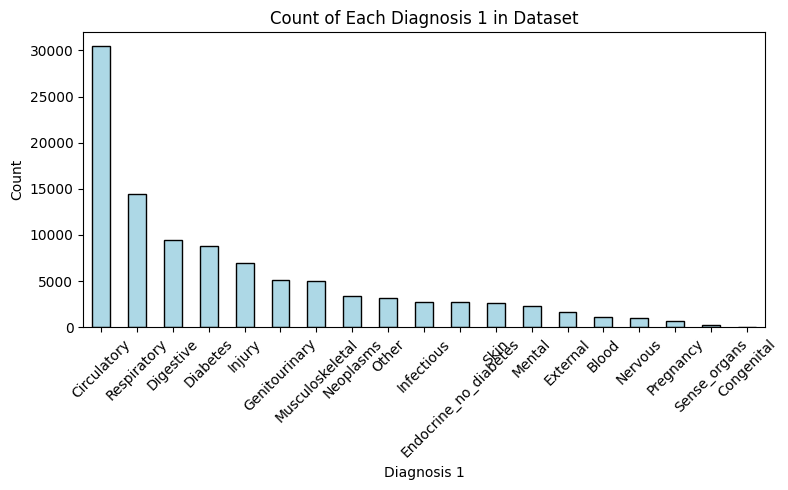

In [292]:
dig_group_1_counts = df_drop['dig_group_1'].value_counts()

# Bar graph of counts of each diagnosis
plt.figure(figsize=(8, 5))
dig_group_1_counts.plot(kind='bar', color='lightblue', edgecolor='black')

plt.title('Count of Each Diagnosis 1 in Dataset')
plt.xlabel('Diagnosis 1')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

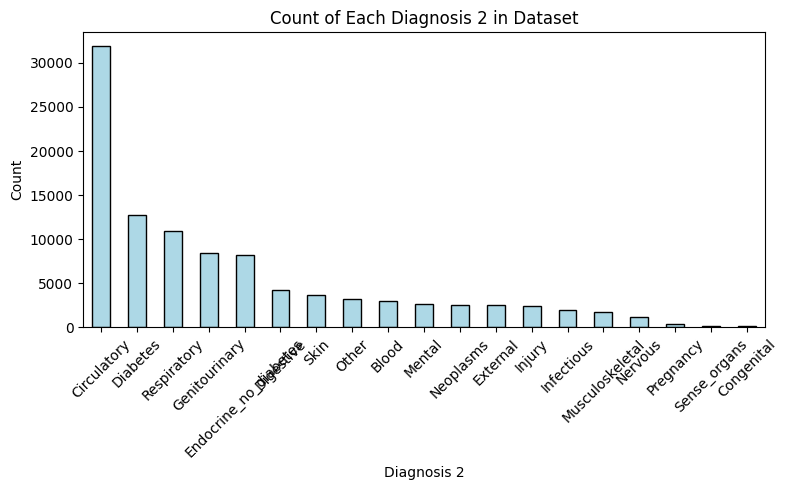

In [293]:
dig_group_2_counts = df_drop['dig_group_2'].value_counts()

# Bar graph of counts of each diagnosis
plt.figure(figsize=(8, 5))
dig_group_2_counts.plot(kind='bar', color='lightblue', edgecolor='black')

plt.title('Count of Each Diagnosis 2 in Dataset')
plt.xlabel('Diagnosis 2')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

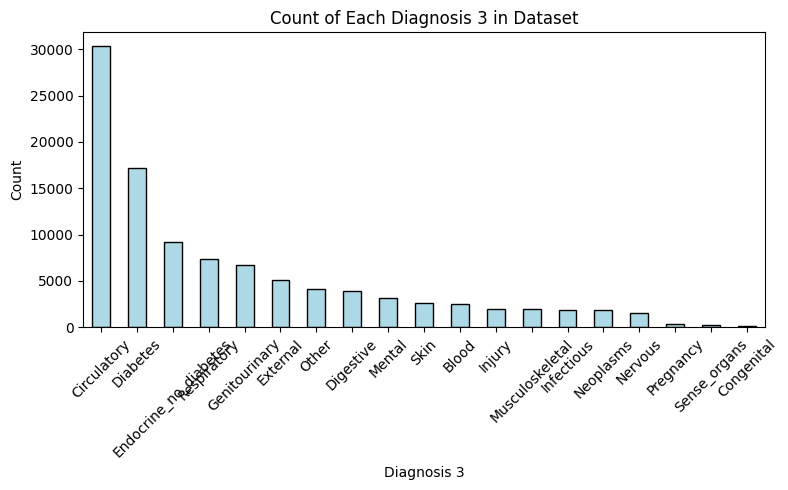

In [294]:
dig_group_3_counts = df_drop['dig_group_3'].value_counts()

# Bar graph of counts of each diagnosis
plt.figure(figsize=(8, 5))
dig_group_3_counts.plot(kind='bar', color='lightblue', edgecolor='black')

plt.title('Count of Each Diagnosis 3 in Dataset')
plt.xlabel('Diagnosis 3')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1879114067.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 75)` for the same effect.

  sns.barplot(x='age', y='time_in_hospital', data=df_drop, ci=75)


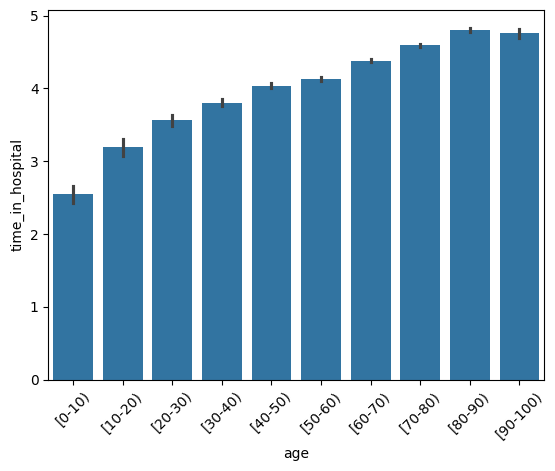

In [295]:
#bar graph time in hospital vs time
sns.barplot(x='age', y='time_in_hospital', data=df_drop, ci=75)
plt.xticks(rotation=45)
plt.show()


In [296]:
# double-checking what is in df_drop and the number of times each thing occurs
for column in df_drop:
    print(df_drop[column].value_counts(1))
    print("-" * 50)

race
Caucasian          0.747806
AfricanAmerican    0.188772
?                  0.022317
Hispanic           0.020017
Other              0.014789
Asian              0.006299
Name: proportion, dtype: float64
--------------------------------------------------
gender
Female    0.537602
Male      0.462398
Name: proportion, dtype: float64
--------------------------------------------------
age
[70-80)     0.256144
[60-70)     0.220925
[50-60)     0.169570
[80-90)     0.168991
[40-50)     0.095172
[30-40)     0.037096
[90-100)    0.027446
[20-30)     0.016283
[10-20)     0.006790
[0-10)      0.001582
Name: proportion, dtype: float64
--------------------------------------------------
discharge_disposition_id
1     0.591885
3     0.137123
6     0.126785
18    0.036271
2     0.020911
22    0.019575
11    0.016136
5     0.011635
25    0.009719
4     0.008009
7     0.006122
23    0.004049
13    0.003921
14    0.003656
28    0.001366
8     0.001061
15    0.000619
24    0.000472
9     0.000206
17    

In [297]:
#creates a new column with binary for 0 lived and 1 died
def add_mortality_column(df):

    death_codes = {11, 19, 20, 21}

    df['mortality'] = df['discharge_disposition_id'].apply(
        lambda x: 'died' if x in death_codes else 'lived'
    )

    return df


In [298]:
#See if someone died according to there discharge ID
df_drop = add_mortality_column(df_drop)
print(df_drop[['discharge_disposition_id', 'mortality']])


        discharge_disposition_id mortality
0                             25     lived
1                              1     lived
2                              1     lived
3                              1     lived
4                              1     lived
...                          ...       ...
101761                         3     lived
101762                         4     lived
101763                         1     lived
101764                         3     lived
101765                         1     lived

[101763 rows x 2 columns]


In [299]:
#counts the patients who lived and died
print(df_drop['mortality'].value_counts())

mortality
lived    100111
died       1652
Name: count, dtype: int64


In [300]:
# double-checking what is in df_drop and the number of times each thing occurs
for column in df_drop:
    print(df_drop[column].value_counts(1))
    print("-" * 50)

race
Caucasian          0.747806
AfricanAmerican    0.188772
?                  0.022317
Hispanic           0.020017
Other              0.014789
Asian              0.006299
Name: proportion, dtype: float64
--------------------------------------------------
gender
Female    0.537602
Male      0.462398
Name: proportion, dtype: float64
--------------------------------------------------
age
[70-80)     0.256144
[60-70)     0.220925
[50-60)     0.169570
[80-90)     0.168991
[40-50)     0.095172
[30-40)     0.037096
[90-100)    0.027446
[20-30)     0.016283
[10-20)     0.006790
[0-10)      0.001582
Name: proportion, dtype: float64
--------------------------------------------------
discharge_disposition_id
1     0.591885
3     0.137123
6     0.126785
18    0.036271
2     0.020911
22    0.019575
11    0.016136
5     0.011635
25    0.009719
4     0.008009
7     0.006122
23    0.004049
13    0.003921
14    0.003656
28    0.001366
8     0.001061
15    0.000619
24    0.000472
9     0.000206
17    

In [301]:
df_drop.drop(['discharge_disposition_id','discharge_disposition','admission_type','diag_1','diag_2','diag_3'], axis=1, inplace=True)

In [302]:
# double-checking what is in df_drop and the number of times each thing occurs
for column in df_drop:
    print(df_drop[column].value_counts(1))
    print("-" * 50)

race
Caucasian          0.747806
AfricanAmerican    0.188772
?                  0.022317
Hispanic           0.020017
Other              0.014789
Asian              0.006299
Name: proportion, dtype: float64
--------------------------------------------------
gender
Female    0.537602
Male      0.462398
Name: proportion, dtype: float64
--------------------------------------------------
age
[70-80)     0.256144
[60-70)     0.220925
[50-60)     0.169570
[80-90)     0.168991
[40-50)     0.095172
[30-40)     0.037096
[90-100)    0.027446
[20-30)     0.016283
[10-20)     0.006790
[0-10)      0.001582
Name: proportion, dtype: float64
--------------------------------------------------
time_in_hospital
3     0.174484
2     0.169256
1     0.139599
4     0.136828
5     0.097933
6     0.074084
7     0.057575
8     0.043139
9     0.029500
10    0.023014
11    0.018229
12    0.014229
13    0.011890
14    0.010239
Name: proportion, dtype: float64
--------------------------------------------------
numbe

In [303]:
#Encoding the dataframe
df_encoded = pd.get_dummies(df_drop, drop_first=False)
df_encoded_copy = df_encoded.copy()
df_encoded_copy_prediction = df_encoded.copy()
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101763 entries, 0 to 101765
Data columns (total 79 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   time_in_hospital                   101763 non-null  int64
 1   number_diagnoses                   101763 non-null  int64
 2   race_?                             101763 non-null  bool 
 3   race_AfricanAmerican               101763 non-null  bool 
 4   race_Asian                         101763 non-null  bool 
 5   race_Caucasian                     101763 non-null  bool 
 6   race_Hispanic                      101763 non-null  bool 
 7   race_Other                         101763 non-null  bool 
 8   gender_Female                      101763 non-null  bool 
 9   gender_Male                        101763 non-null  bool 
 10  age_[0-10)                         101763 non-null  bool 
 11  age_[10-20)                        101763 non-null  bool 
 12  age_[20

In [304]:
#Looking in df_encoded
for column in df_encoded:
    print(df_encoded[column].value_counts(1))
    print("-" * 50)

time_in_hospital
3     0.174484
2     0.169256
1     0.139599
4     0.136828
5     0.097933
6     0.074084
7     0.057575
8     0.043139
9     0.029500
10    0.023014
11    0.018229
12    0.014229
13    0.011890
14    0.010239
Name: proportion, dtype: float64
--------------------------------------------------
number_diagnoses
9     0.486159
5     0.111946
8     0.104321
7     0.102129
6     0.099850
4     0.054401
3     0.027859
2     0.010053
1     0.002152
16    0.000442
10    0.000167
13    0.000157
11    0.000108
15    0.000098
12    0.000088
14    0.000069
Name: proportion, dtype: float64
--------------------------------------------------
race_?
False    0.977683
True     0.022317
Name: proportion, dtype: float64
--------------------------------------------------
race_AfricanAmerican
False    0.811228
True     0.188772
Name: proportion, dtype: float64
--------------------------------------------------
race_Asian
False    0.993701
True     0.006299
Name: proportion, dtype: float64



Top 20 Important Variables:
                 Variable  Importance
0        number_diagnoses    0.594995
25   dig_group_1_External    0.206375
29     dig_group_1_Mental    0.093137
75       dig_group_3_Skin    0.039362
31  dig_group_1_Neoplasms    0.039040
50  dig_group_2_Neoplasms    0.018884
70    dig_group_3_Nervous    0.002936
13            age_[40-50)    0.002638
14            age_[50-60)    0.001711
5           race_Hispanic    0.000923
4          race_Caucasian    0.000000
1                  race_?    0.000000
3              race_Asian    0.000000
2    race_AfricanAmerican    0.000000
12            age_[30-40)    0.000000
11            age_[20-30)    0.000000
10            age_[10-20)    0.000000
9              age_[0-10)    0.000000
7           gender_Female    0.000000
8             gender_Male    0.000000


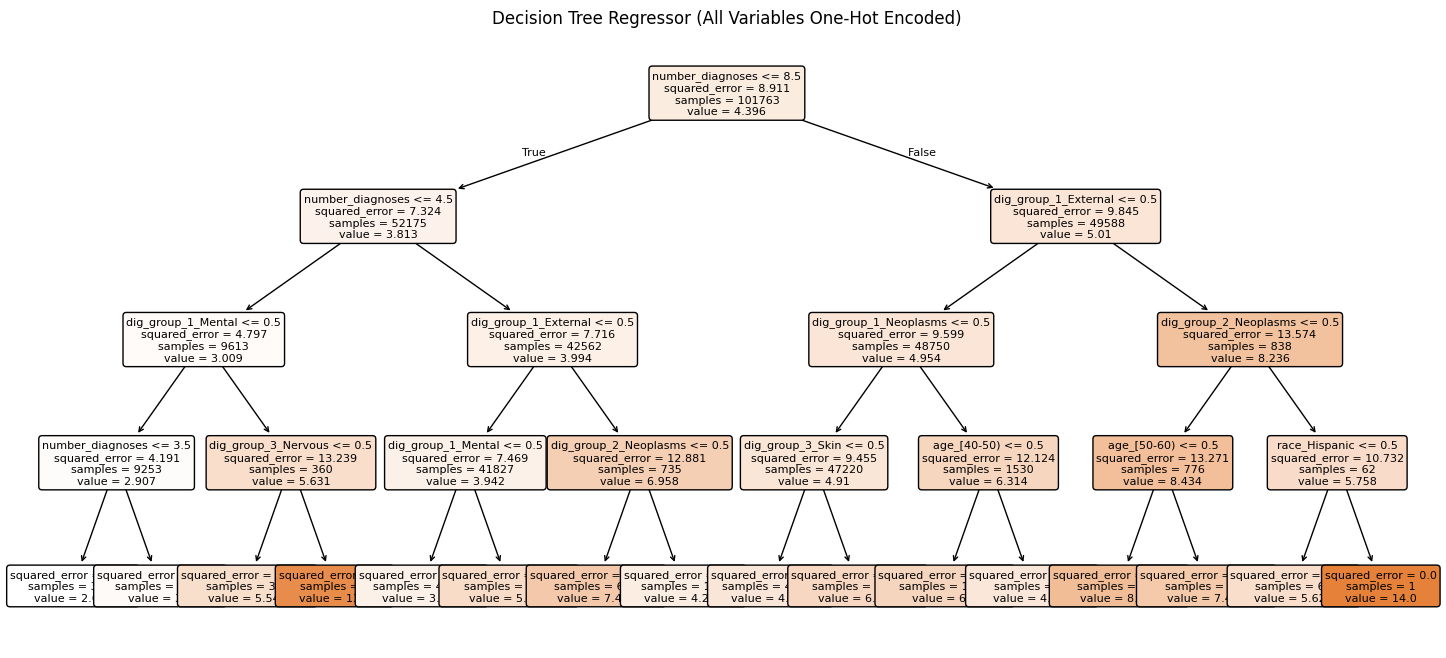

/tmp/ipython-input-3668240266.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance.head(10), x="Importance", y="Variable", palette="viridis")


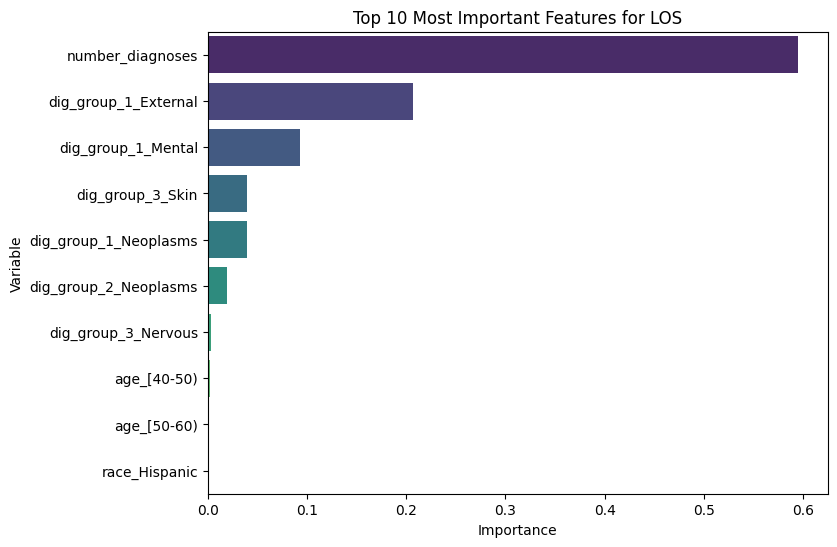

Mean Absolute Error (MAE): 2.22304549444156
Mean Squared Error (MSE): 8.175362868046609
Root Mean Squared Error (RMSE): 2.8592591467103166
R-squared (R²): 0.08252182621402948


In [305]:
#Getting X
X = df_encoded.drop(["time_in_hospital"], axis=1, errors='ignore')
#Getting end goal for training
y = df_encoded["time_in_hospital"]
#Creating tree
tree_main = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_main.fit(X, y)

importance = (
    pd.DataFrame({
        "Variable": X.columns,
        "Importance": tree_main.feature_importances_
    })
    .sort_values(by="Importance", ascending=False)
)
# Calculating Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, R2 to check how good the tree is
mae = mean_absolute_error(y, tree_main.predict(X))
mse = mean_squared_error(y, tree_main.predict(X))
rmse = np.sqrt(mse)
r2 = r2_score(y, tree_main.predict(X))
#outputting variables with the most influence
print("\nTop 20 Important Variables:")
print(importance.head(20))


plt.figure(figsize=(18,8))
plot_tree(tree_main, feature_names=X.columns, filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Regressor (All Variables One-Hot Encoded)")
plt.show()


plt.figure(figsize=(8,6))
sns.barplot(data=importance.head(10), x="Importance", y="Variable", palette="viridis")
plt.title("Top 10 Most Important Features for LOS")
plt.show()

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


In [306]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101763 entries, 0 to 101765
Data columns (total 79 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   time_in_hospital                   101763 non-null  int64
 1   number_diagnoses                   101763 non-null  int64
 2   race_?                             101763 non-null  bool 
 3   race_AfricanAmerican               101763 non-null  bool 
 4   race_Asian                         101763 non-null  bool 
 5   race_Caucasian                     101763 non-null  bool 
 6   race_Hispanic                      101763 non-null  bool 
 7   race_Other                         101763 non-null  bool 
 8   gender_Female                      101763 non-null  bool 
 9   gender_Male                        101763 non-null  bool 
 10  age_[0-10)                         101763 non-null  bool 
 11  age_[10-20)                        101763 non-null  bool 
 12  age_[20


=== Processing age group 0-10 ===

Mean Absolute Error (MAE) for 0-10: 0.8015111182813045
Mean Squared Error (MSE) for 0-10: 0.9776693286010055
Root Mean Squared Error (RMSE) for 0-10: 0.9887716261104005
R-squared (R²) for 0-10: 0.3943655800911322

📌 Decision Tree for 0-10


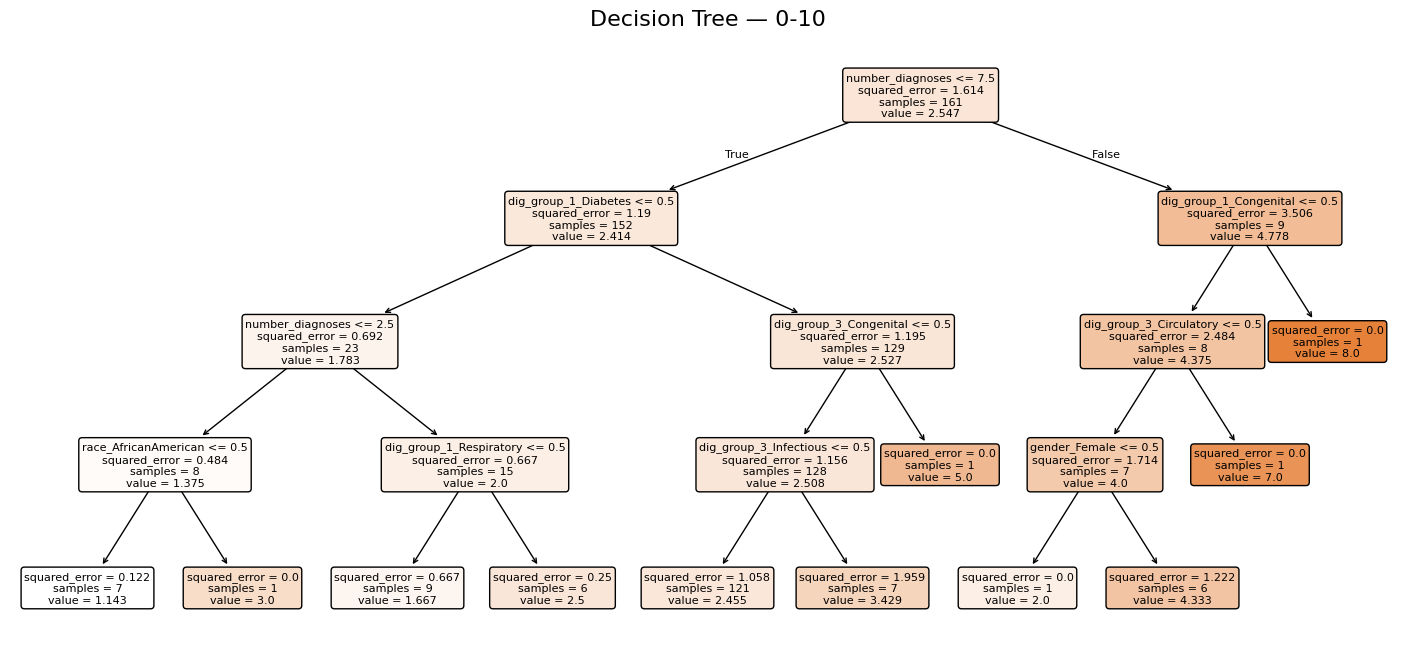

Created variable: tree_age_0_10

=== Processing age group 10-20 ===

Mean Absolute Error (MAE) for 10-20: 1.2771311562571699
Mean Squared Error (MSE) for 10-20: 3.3570163244154374
Root Mean Squared Error (RMSE) for 10-20: 1.832216232985462
R-squared (R²) for 10-20: 0.5073679111927987

📌 Decision Tree for 10-20


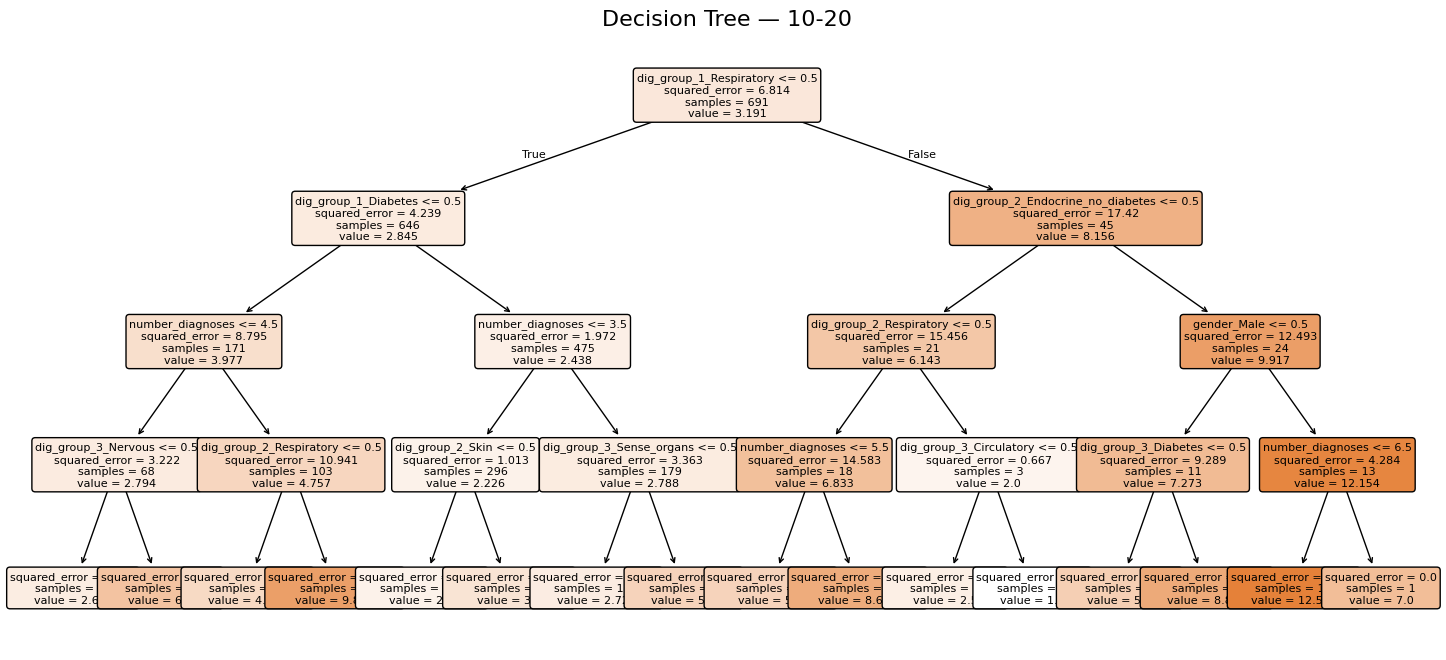

Created variable: tree_age_10_20

=== Processing age group 20-30 ===

Mean Absolute Error (MAE) for 20-30: 1.7243459883235561
Mean Squared Error (MSE) for 20-30: 5.5224143716531655
Root Mean Squared Error (RMSE) for 20-30: 2.3499817811321786
R-squared (R²) for 20-30: 0.14856185098203212

📌 Decision Tree for 20-30


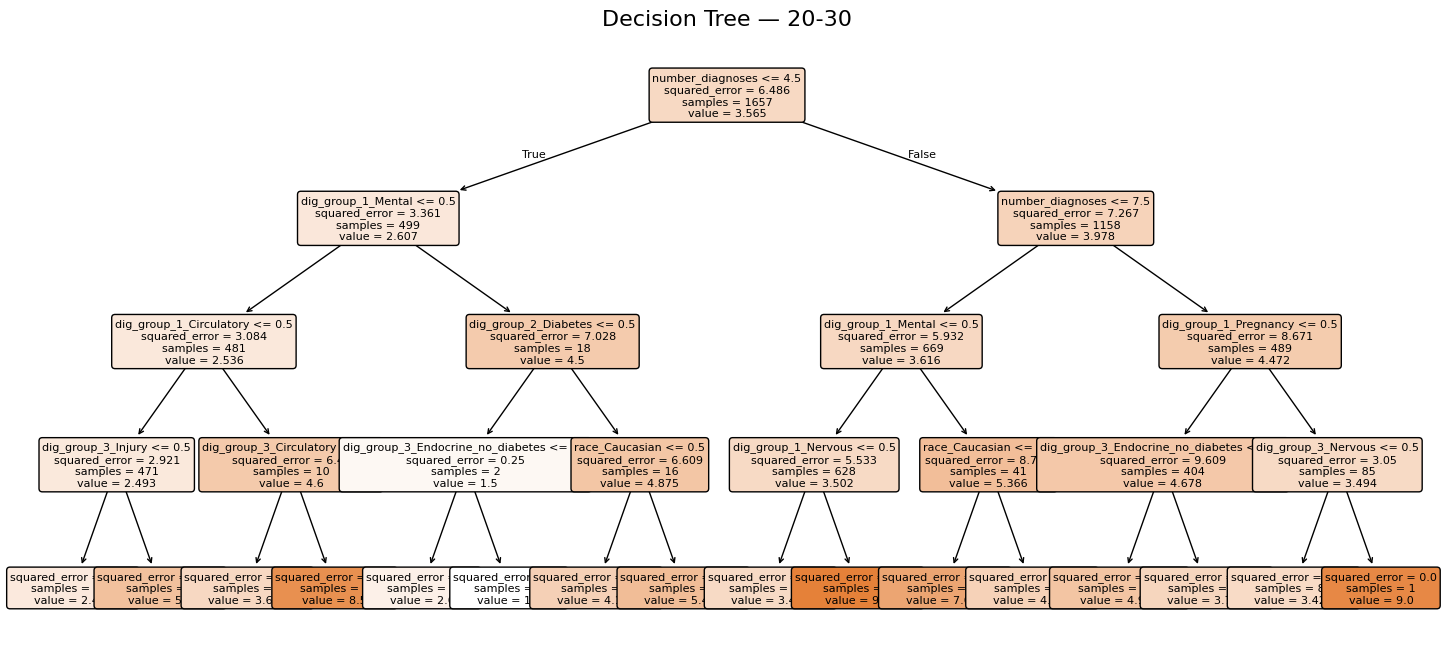

Created variable: tree_age_20_30

=== Processing age group 30-40 ===

Mean Absolute Error (MAE) for 30-40: 1.9170119774877952
Mean Squared Error (MSE) for 30-40: 6.486554690552893
Root Mean Squared Error (RMSE) for 30-40: 2.546871549676758
R-squared (R²) for 30-40: 0.10221436080964774

📌 Decision Tree for 30-40


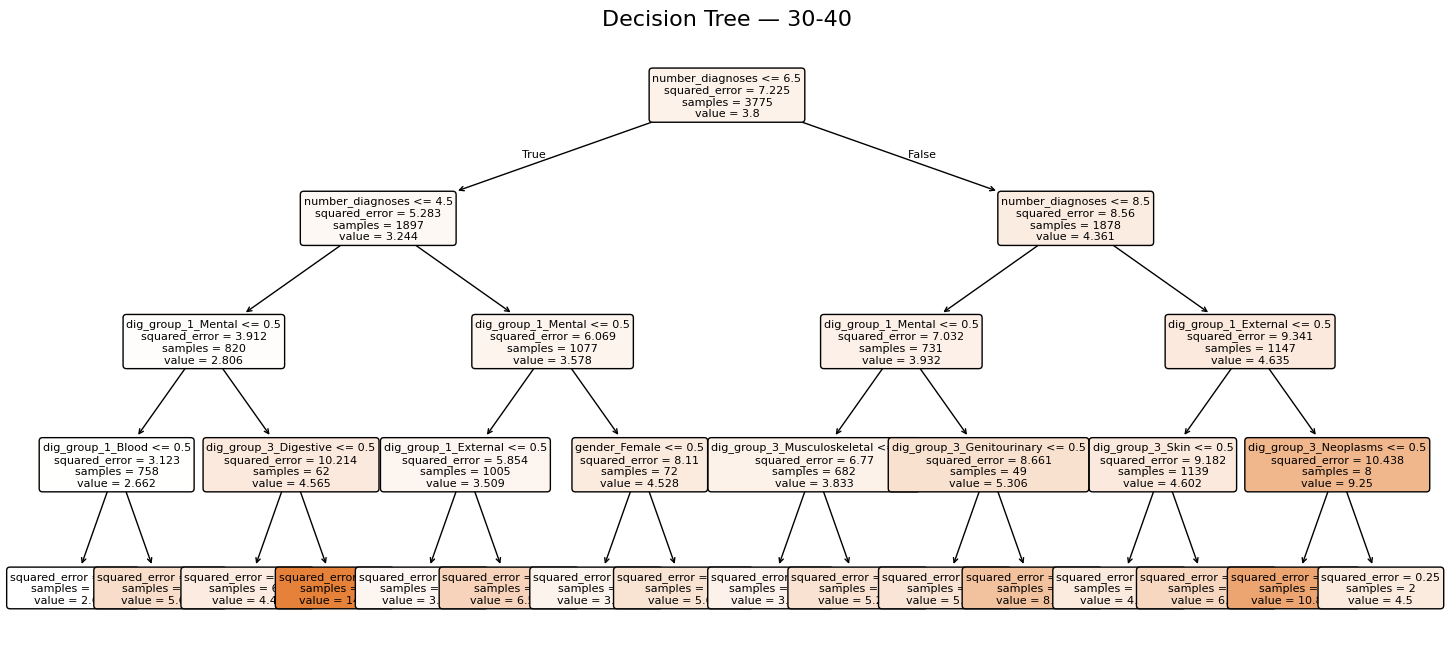

Created variable: tree_age_30_40

=== Processing age group 40-50 ===

Mean Absolute Error (MAE) for 40-50: 2.1212762025995135
Mean Squared Error (MSE) for 40-50: 7.61657887579464
Root Mean Squared Error (RMSE) for 40-50: 2.7598150075312367
R-squared (R²) for 40-50: 0.08694319878925061

📌 Decision Tree for 40-50


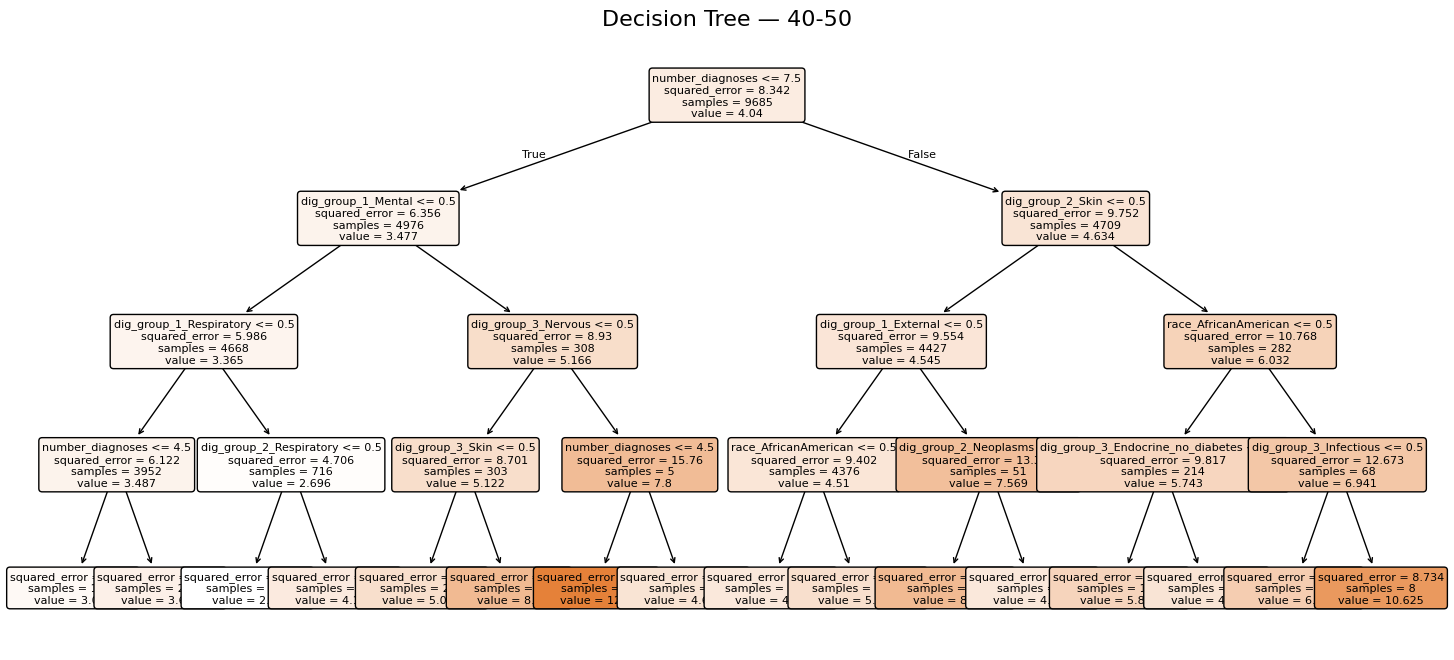

Created variable: tree_age_40_50

=== Processing age group 50-60 ===

Mean Absolute Error (MAE) for 50-60: 2.1597719582073105
Mean Squared Error (MSE) for 50-60: 7.742858997818114
Root Mean Squared Error (RMSE) for 50-60: 2.782599323980748
R-squared (R²) for 50-60: 0.09037226352929939

📌 Decision Tree for 50-60


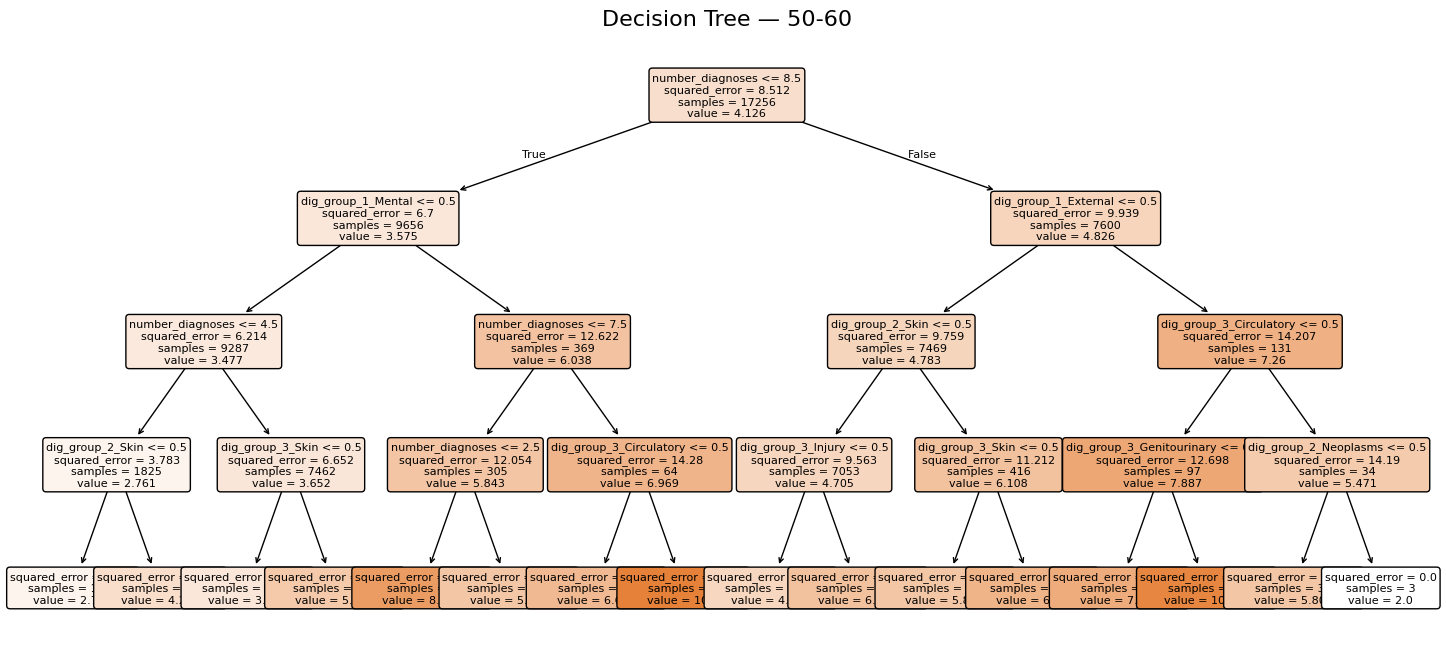

Created variable: tree_age_50_60

=== Processing age group 60-70 ===

Mean Absolute Error (MAE) for 60-70: 2.2547736308559414
Mean Squared Error (MSE) for 60-70: 8.300454862235018
Root Mean Squared Error (RMSE) for 60-70: 2.881050999589389
R-squared (R²) for 60-70: 0.07978086396590389

📌 Decision Tree for 60-70


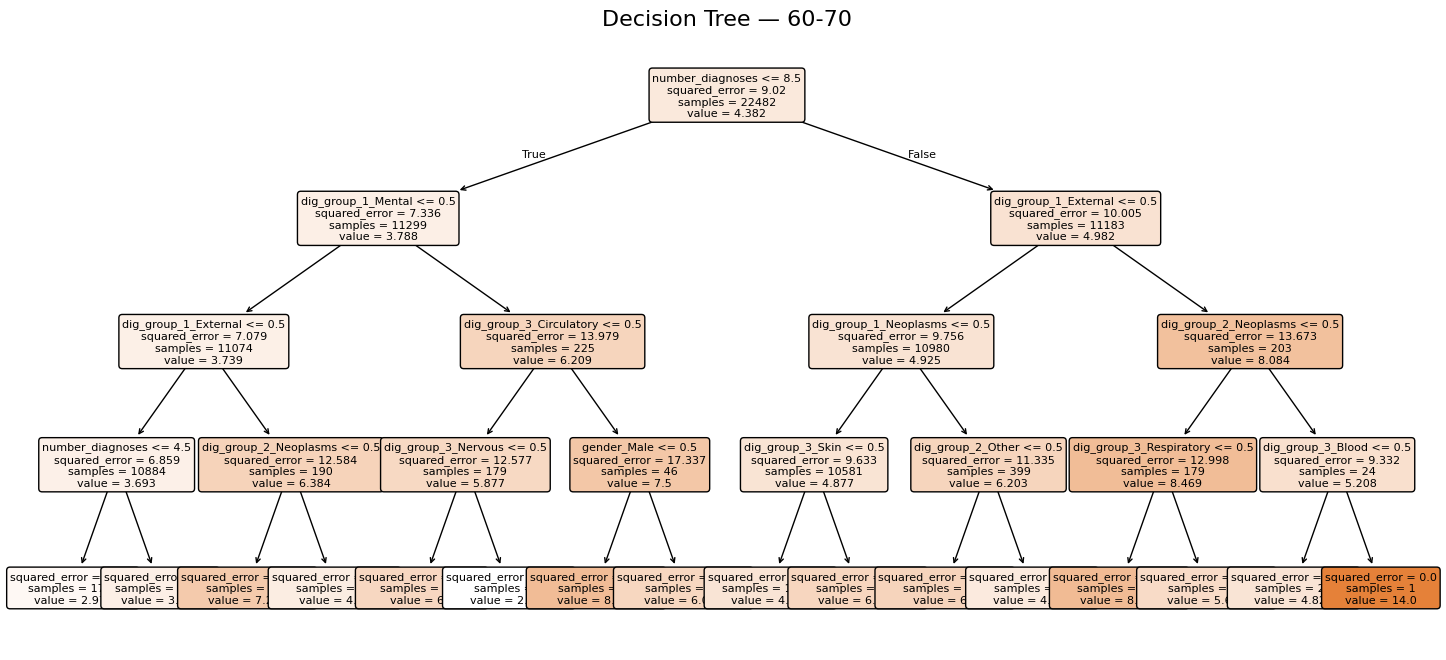

Created variable: tree_age_60_70

=== Processing age group 70-80 ===

Mean Absolute Error (MAE) for 70-80: 2.2778600519937573
Mean Squared Error (MSE) for 70-80: 8.532520741902234
Root Mean Squared Error (RMSE) for 70-80: 2.9210478842193317
R-squared (R²) for 70-80: 0.07949975830391054

📌 Decision Tree for 70-80


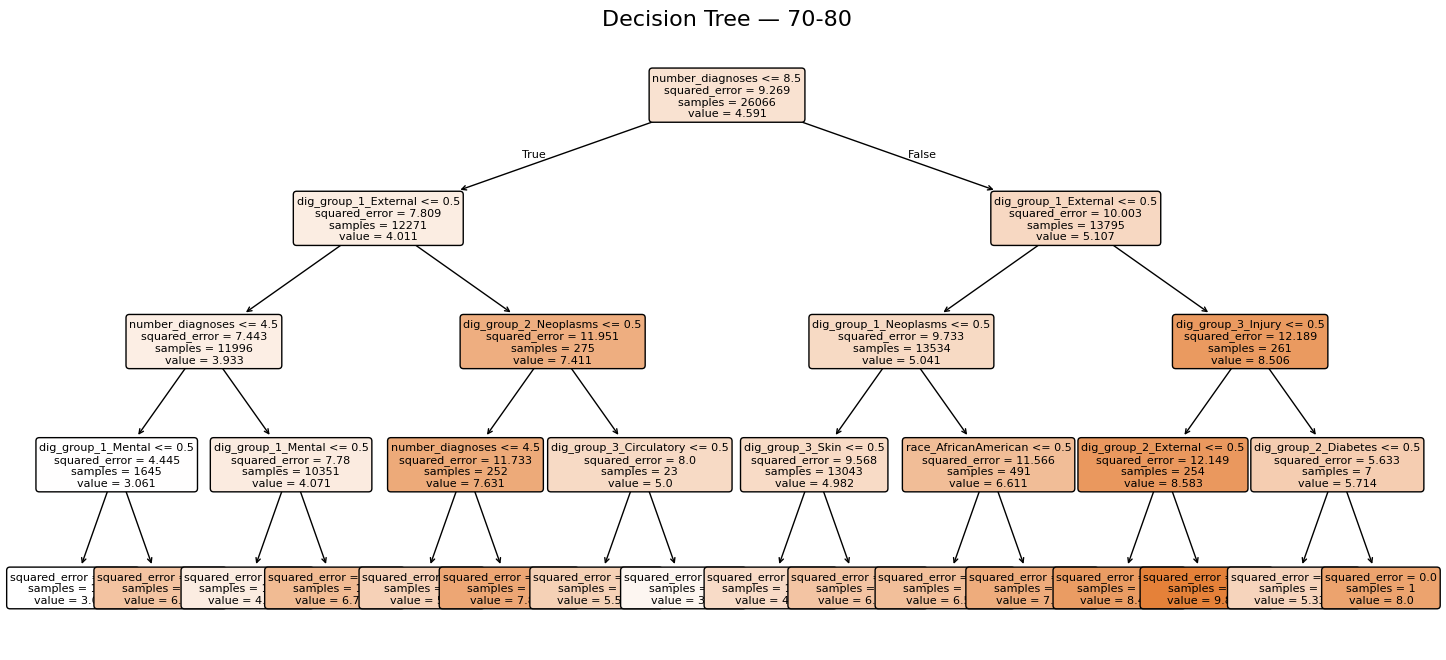

Created variable: tree_age_70_80

=== Processing age group 80-90 ===

Mean Absolute Error (MAE) for 80-90: 2.300376548308799
Mean Squared Error (MSE) for 80-90: 8.546275068108447
Root Mean Squared Error (RMSE) for 80-90: 2.9234012841394947
R-squared (R²) for 80-90: 0.0697800128812921

📌 Decision Tree for 80-90


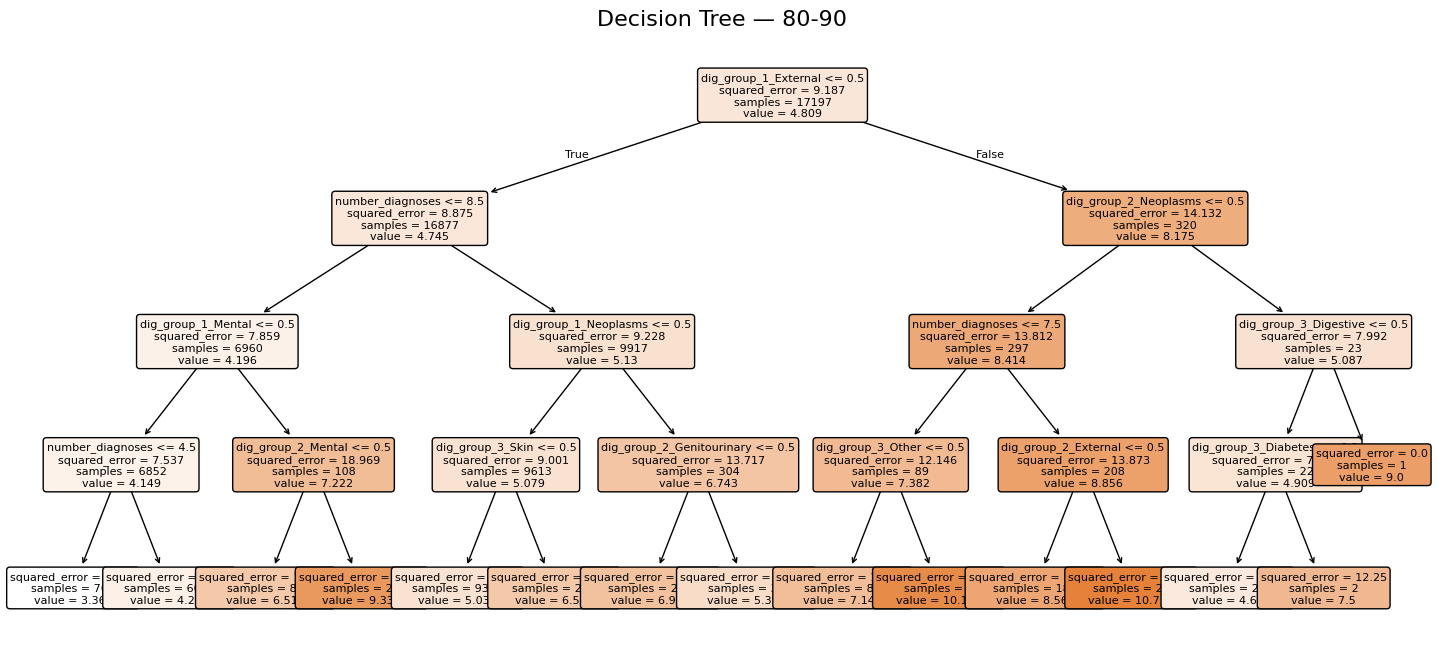

Created variable: tree_age_80_90

=== Processing age group 90-100 ===

Mean Absolute Error (MAE) for 90-100: 2.1584895452214856
Mean Squared Error (MSE) for 90-100: 7.684012410825234
Root Mean Squared Error (RMSE) for 90-100: 2.7720051246029893
R-squared (R²) for 90-100: 0.06263341264520694

📌 Decision Tree for 90-100


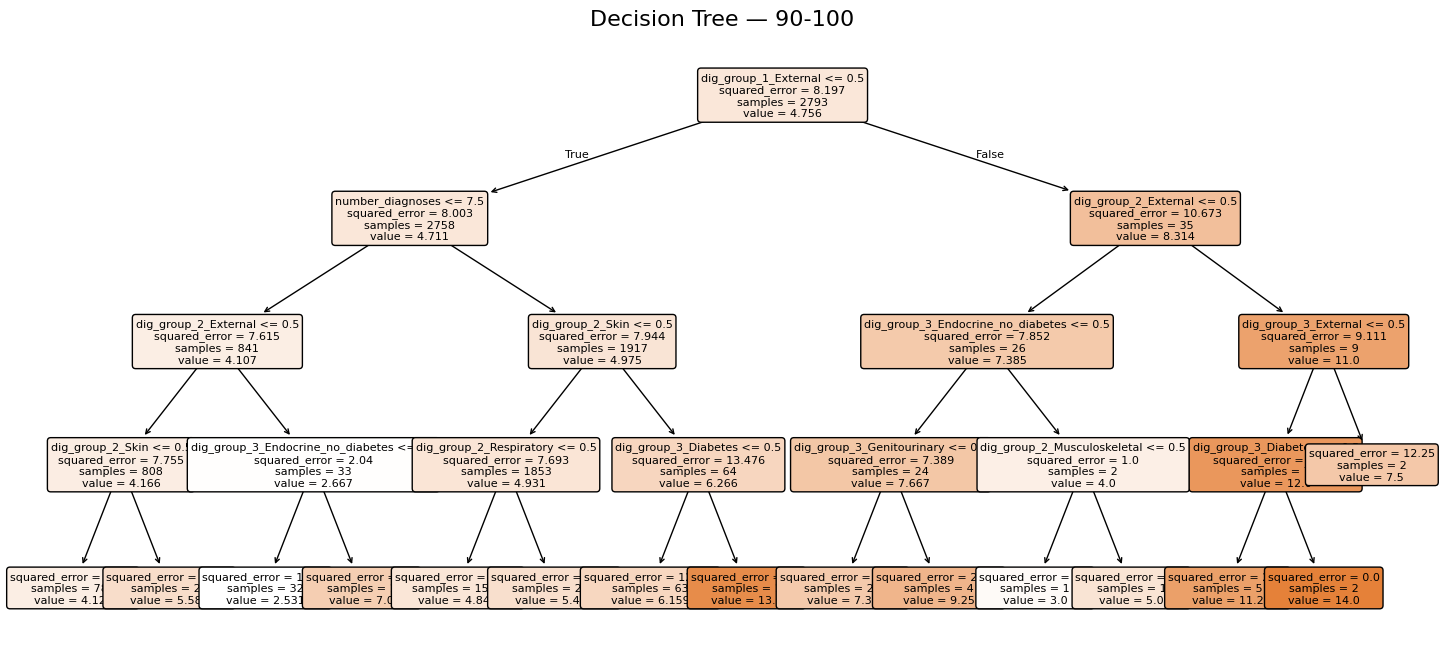

Created variable: tree_age_90_100

 Top 10 Features — Age Group 0-10
               Variable  Importance
       number_diagnoses    0.482897
 dig_group_1_Congenital    0.113961
   dig_group_1_Diabetes    0.105566
dig_group_3_Circulatory    0.076832
 dig_group_3_Infectious    0.061250
 dig_group_3_Congenital    0.060128
          gender_Female    0.045530
   race_AfricanAmerican    0.029444
dig_group_1_Respiratory    0.024391
             race_Other    0.000000

 Top 10 Features — Age Group 10-20
                         Variable  Importance
          dig_group_1_Respiratory    0.496572
             dig_group_1_Diabetes    0.124607
                 number_diagnoses    0.118155
          dig_group_2_Respiratory    0.093857
dig_group_2_Endocrine_no_diabetes    0.066765
                      gender_Male    0.059420
             dig_group_3_Diabetes    0.013456
              dig_group_3_Nervous    0.011845
         dig_group_3_Sense_organs    0.010537
                 dig_group_2_Skin    0.

In [307]:
age_columns = [
    'age_[0-10)',
    'age_[10-20)',
    'age_[20-30)',
    'age_[30-40)',
    'age_[40-50)',
    'age_[50-60)',
    'age_[60-70)',
    'age_[70-80)',
    'age_[80-90)',
    'age_[90-100)'
]
def get_feature_importance(df, group_name):

    # Drop target only (not age columns!)
    X = df.drop(['time_in_hospital'], axis=1, errors='ignore')
    y = df['time_in_hospital']

    tree = DecisionTreeRegressor(max_depth=4, random_state=42)
    tree.fit(X, y)

    importance = (
        pd.DataFrame({"Variable": X.columns, "Importance": tree.feature_importances_})
        .sort_values(by="Importance", ascending=False)
    )

    # Metrics
    mae = mean_absolute_error(y, tree.predict(X))
    mse = mean_squared_error(y, tree.predict(X))
    rmse = np.sqrt(mse)
    r2 = r2_score(y, tree.predict(X))
    # Calculating Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, R2 to check how good the tree is
    print(f"\nMean Absolute Error (MAE) for {group_name}:", mae)
    print(f"Mean Squared Error (MSE) for {group_name}:", mse)
    print(f"Root Mean Squared Error (RMSE) for {group_name}:", rmse)
    print(f"R-squared (R²) for {group_name}:", r2)

    # Plot tree
    print(f"\n📌 Decision Tree for {group_name}")
    plt.figure(figsize=(18, 8))
    plot_tree(tree, feature_names=X.columns, filled=True, rounded=True, fontsize=8)
    plt.title(f"Decision Tree — {group_name}", fontsize=16)
    plt.show()

    return importance, tree
importance_age = {}
tree_age = {}

for col in age_columns:
    age_name = col.replace("age_", "").replace("[", "").replace(")", "")  # e.g. "0-10"
    safe_name = age_name.replace("-", "_")  # variable-safe

    print(f"\n=== Processing age group {age_name} ===")

    df_age = df_encoded_copy[df_encoded_copy[col] == True]

    imp, tree_model = get_feature_importance(df_age, age_name)

    importance_age[safe_name] = imp
    tree_age[safe_name] = tree_model

    # create variable dynamically
    globals()[f"tree_age_{safe_name}"] = tree_model
    print(f"Created variable: tree_age_{safe_name}")
#outputting variables with the most influence
for age_key, imp_df in importance_age.items():
  print(f"\n Top 10 Features — Age Group {age_key.replace('_','-')}")
  top10 = imp_df.sort_values("Importance", ascending=False).head(10)
  print(top10.to_string(index=False))



In [308]:

# Separate survived and died patients
df_survived = df_encoded[df_encoded['mortality_died'] == False]
df_died = df_encoded[df_encoded['mortality_died'] == True]

X_survived = df_survived.drop(['time_in_hospital', 'mortality_died', 'mortality_lived'], axis=1, errors='ignore')
y_survived = df_survived['time_in_hospital']

X_died = df_died.drop(['time_in_hospital', 'mortality_died', 'mortality_lived'], axis=1, errors='ignore')
y_died = df_died['time_in_hospital']

# Survived
tree_survived = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_survived.fit(X_survived, y_survived)

# Died
tree_died = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_died.fit(X_died, y_died)

mort_model = RandomForestClassifier(n_estimators=100, random_state=42)
mort_model.fit(X_died, y_died)

importance_survived = pd.DataFrame({
    "Variable": X_survived.columns,
    "Importance": tree_survived.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance_died = pd.DataFrame({
    "Variable": X_died.columns,
    "Importance": tree_died.feature_importances_
}).sort_values(by="Importance", ascending=False)
# Calculating Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, R2 to check how good the tree is
mae_survived = mean_absolute_error(y_survived, tree_survived.predict(X_survived))
mae_died = mean_absolute_error(y_died, tree_died.predict(X_died))

mse_survived = mean_squared_error(y_survived, tree_survived.predict(X_survived))
mse_died = mean_squared_error(y_died, tree_died.predict(X_died))

rmse_survied = np.sqrt(mse_survived)
rmse_died = np.sqrt(mse_died)

r2_survived = r2_score(y_survived, tree_survived.predict(X_survived))
r2_died = r2_score(y_died, tree_died.predict(X_died))
#outputting variables with the most influence
print("Top 10 Important Features for LOS (Survived):")
print(importance_survived.head(10))

print("\nTop 10 Important Features for LOS (Died):")
print(importance_died.head(10))

print("\nMean Absolute Error (MAE) for Survived:")
print(mae_survived)

print("\nMean Absolute Error (MAE) for Died:")
print(mae_died)

print("\nMean Squared Error (MSE) for Survived:")
print(mse_survived)

print("\nMean Squared Error (MSE) for Died:")
print(mse_died)

print("\nRoot Mean Squared Error (RMSE) for Survived:")
print(rmse_survied)

print("\nRoot Mean Squared Error (RMSE) for Died:")
print(rmse_died)

print("\nR-squared (R²) for Survived:")
print(r2_survived)


Top 10 Important Features for LOS (Survived):
                 Variable  Importance
0        number_diagnoses    0.590824
25   dig_group_1_External    0.209370
29     dig_group_1_Mental    0.094279
31  dig_group_1_Neoplasms    0.040320
75       dig_group_3_Skin    0.038300
50  dig_group_2_Neoplasms    0.018846
70    dig_group_3_Nervous    0.002953
22   dig_group_1_Diabetes    0.002456
14            age_[50-60)    0.001727
5           race_Hispanic    0.000925

Top 10 Important Features for LOS (Died):
                             Variable  Importance
0                    number_diagnoses    0.349399
31              dig_group_1_Neoplasms    0.246355
57                  dig_group_3_Blood    0.080182
43  dig_group_2_Endocrine_no_diabetes    0.078769
52                  dig_group_2_Other    0.066342
65             dig_group_3_Infectious    0.056957
39            dig_group_2_Circulatory    0.048106
2                race_AfricanAmerican    0.026455
27             dig_group_1_Infectious    0.

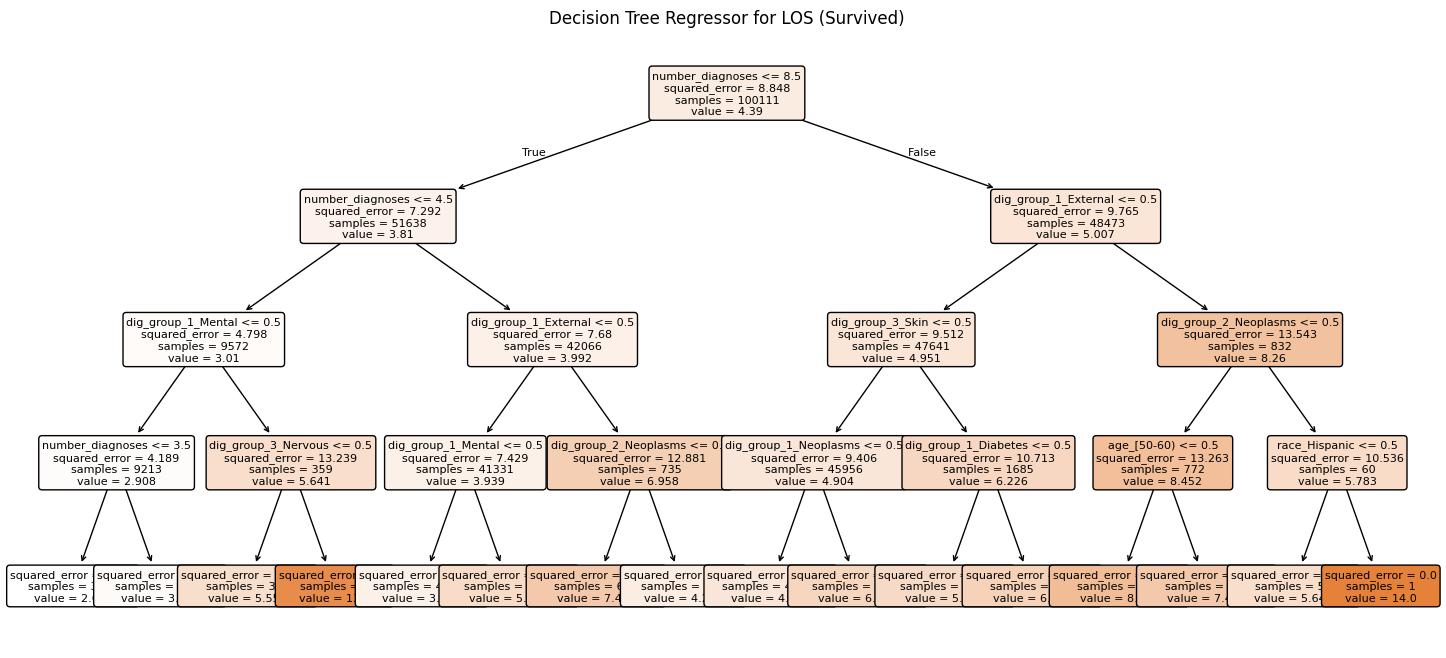

/tmp/ipython-input-871577631.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_survived.head(10), x="Importance", y="Variable", palette="viridis")


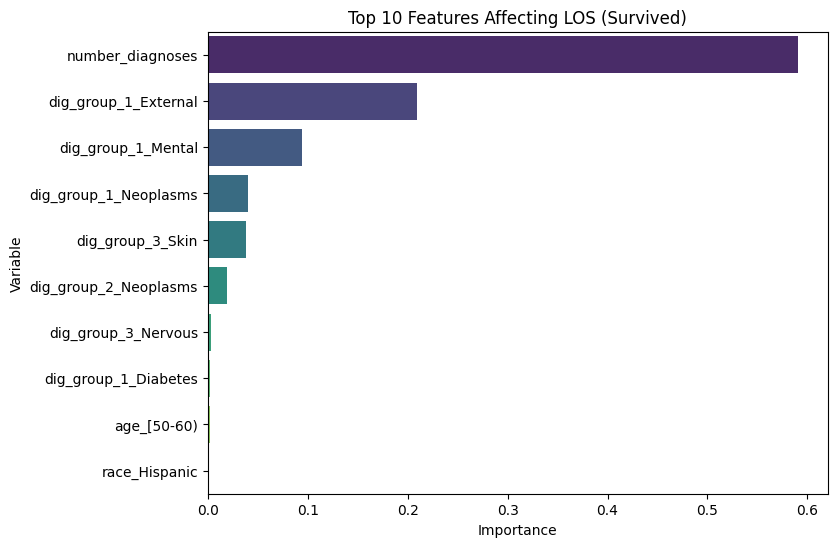

In [309]:
# Survived
plt.figure(figsize=(18,8))
plot_tree(tree_survived, feature_names=X_survived.columns, filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Regressor for LOS (Survived)")
plt.show()



# Feature importance plots
plt.figure(figsize=(8,6))
sns.barplot(data=importance_survived.head(10), x="Importance", y="Variable", palette="viridis")
plt.title("Top 10 Features Affecting LOS (Survived)")
plt.show()



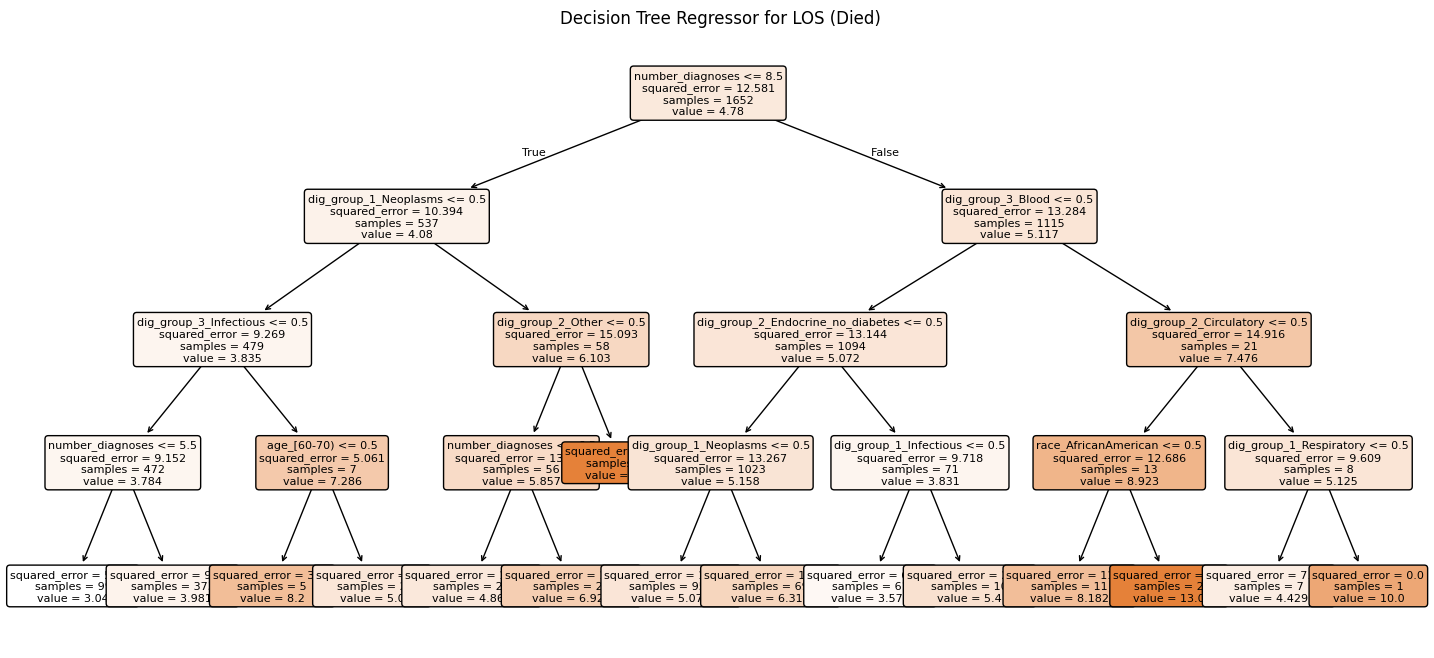

/tmp/ipython-input-3770763655.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_died.head(10), x="Importance", y="Variable", palette="magma")


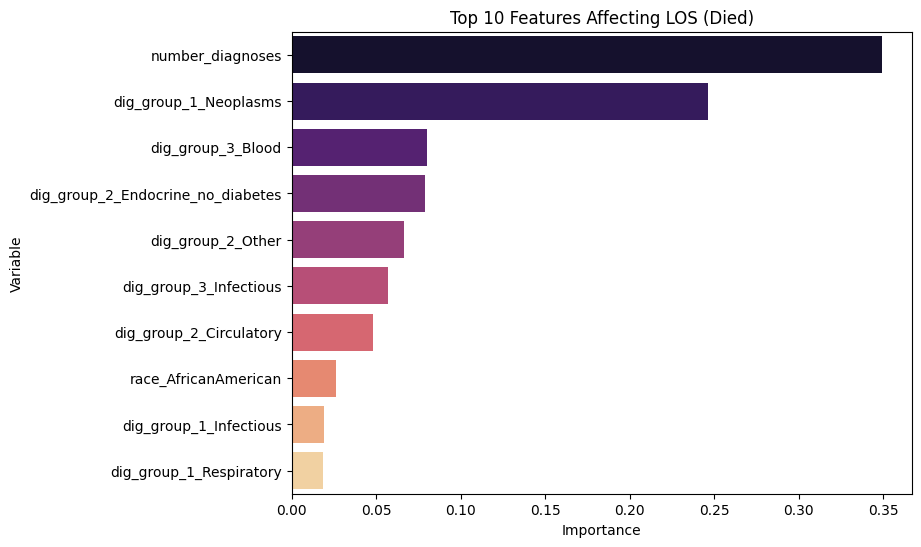

In [310]:
# Died
plt.figure(figsize=(18,8))
plot_tree(tree_died, feature_names=X_died.columns, filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Regressor for LOS (Died)")
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(data=importance_died.head(10), x="Importance", y="Variable", palette="magma")
plt.title("Top 10 Features Affecting LOS (Died)")
plt.show()

Survival and Mortality Percentages by Diagnosis Count:
                  survived_pct   died_pct
number_diagnoses                         
1                   100.000000   0.000000
2                    99.804497   0.195503
3                    99.611993   0.388007
4                    99.494220   0.505780
5                    99.385534   0.614466
6                    98.838697   1.161303
7                    98.826133   1.173867
8                    98.247928   1.752072
9                    97.754331   2.245669
10                  100.000000   0.000000
11                  100.000000   0.000000
12                   88.888889  11.111111
13                  100.000000   0.000000
14                  100.000000   0.000000
15                  100.000000   0.000000
16                   93.333333   6.666667


<Figure size 1200x600 with 0 Axes>

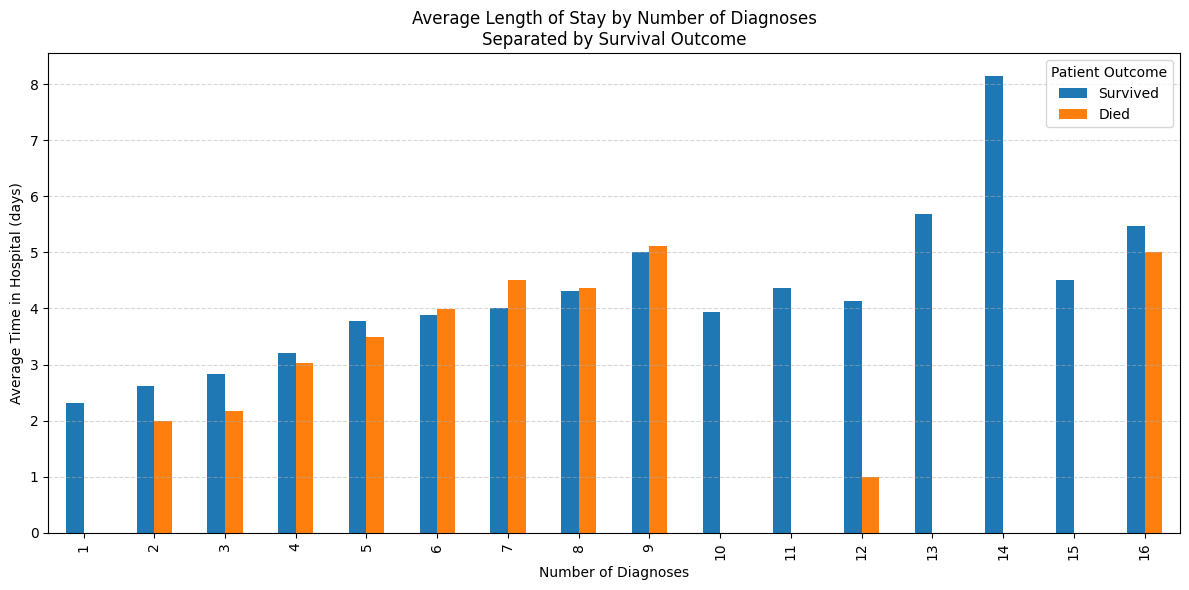

In [311]:
diagnosis_effect_by_outcome = (
    df_encoded
    .groupby(['mortality_died', 'number_diagnoses'])['time_in_hospital']
    .mean()
    .reset_index()
    .sort_values(['mortality_died', 'number_diagnoses'])
)

pivot_effect = diagnosis_effect_by_outcome.pivot(
    index='number_diagnoses',
    columns='mortality_died',
    values='time_in_hospital'
)

# Count total patients per diagnosis group
group_counts = df_encoded.groupby('number_diagnoses')['mortality_died'].count()

# Count deaths per diagnosis
death_counts = df_encoded.groupby('number_diagnoses')['mortality_died'].sum()

# Survived = total - died
survive_counts = group_counts - death_counts

# Build percentage table
survival_stats = pd.DataFrame({
    'survived_pct': (survive_counts / group_counts) * 100,
    'died_pct':     (death_counts / group_counts) * 100
})

print("Survival and Mortality Percentages by Diagnosis Count:")
print(survival_stats)

# Plot
plt.figure(figsize=(12, 6))
pivot_effect.plot(kind='bar', figsize=(12, 6))

plt.title("Average Length of Stay by Number of Diagnoses\nSeparated by Survival Outcome")
plt.xlabel("Number of Diagnoses")
plt.ylabel("Average Time in Hospital (days)")
plt.legend(title="Patient Outcome", labels=["Survived", "Died"])
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


/tmp/ipython-input-2033498778.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


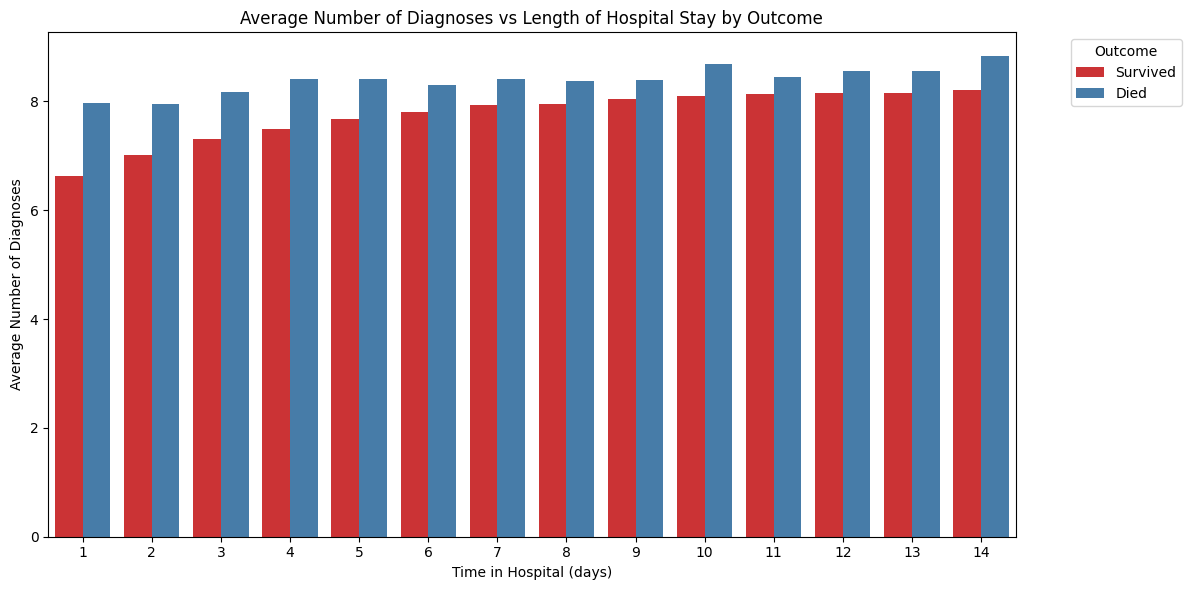

In [312]:
# Convert boolean → readable labels
df_encoded['outcome'] = df_encoded['mortality_died'].map({False: 'Survived', True: 'Died'})

plt.figure(figsize=(12,6))

sns.barplot(
    data=df_encoded,
    x='time_in_hospital',
    y='number_diagnoses',
    hue='outcome',
    estimator='mean',
    ci=None,
    palette='Set1'
)

plt.title("Average Number of Diagnoses vs Length of Hospital Stay by Outcome")
plt.xlabel("Time in Hospital (days)")
plt.ylabel("Average Number of Diagnoses")
plt.legend(title="Outcome", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [313]:
df_encoded.drop('outcome', axis=1, inplace=True)

In [314]:
# Split by gender (handles 0/1 or True/False)
df_female = df_encoded_copy[df_encoded_copy['gender_Female'] == 1]
df_male   = df_encoded_copy[df_encoded_copy['gender_Male'] == 1]


def get_feature_importance(df, group_name):
    # Ensure we have enough samples
    if df.shape[0] < 50:
        print(f"⚠️ Skipping {group_name} — too few records ({df.shape[0]})")
        return None, None

    X = df.drop(['time_in_hospital', 'gender_Female', 'gender_Male'],
                axis=1, errors='ignore')
    y = df['time_in_hospital']

    tree = DecisionTreeRegressor(max_depth=4, random_state=42)
    tree.fit(X, y)

    importance = (
        pd.DataFrame({"Variable": X.columns,
                      "Importance": tree.feature_importances_})
        .sort_values(by="Importance", ascending=False)
    )
    # Calculating Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, R2 to check how good the tree is
    mae = mean_absolute_error(y, tree.predict(X))
    mse = mean_squared_error(y, tree.predict(X))
    rmse = np.sqrt(mse)
    r2 = r2_score(y, tree.predict(X))
    print(f"\nMean Absolute Error (MAE) for {group_name}:", mae)
    print(f"Mean Squared Error (MSE) for {group_name}:", mse)
    print(f"Root Mean Squared Error (RMSE) for {group_name}:", rmse)
    print(f"R-squared (R²) for {group_name}:", r2)
    print(f"\nTop 10 Important Features for LOS ({group_name}):")
    print(importance.head(10))

    # Return both importance and model + feature names (for plotting)
    return importance, tree, X.columns.tolist()

# outputting variables with the most influence
# Run for each gender
importance_female, tree_female, cols_female = get_feature_importance(df_female, "Female")
importance_male,   tree_male,   cols_male   = get_feature_importance(df_male, "Male")





Mean Absolute Error (MAE) for Female: 2.2130201869708404
Mean Squared Error (MSE) for Female: 8.132551679904514
Root Mean Squared Error (RMSE) for Female: 2.8517629073793134
R-squared (R²) for Female: 0.0844347572572578

Top 10 Important Features for LOS (Female):
                 Variable  Importance
0        number_diagnoses    0.614011
23   dig_group_1_External    0.222024
27     dig_group_1_Mental    0.110079
73       dig_group_3_Skin    0.030165
48  dig_group_2_Neoplasms    0.014928
42   dig_group_2_External    0.003805
4          race_Caucasian    0.003242
5           race_Hispanic    0.001746
3              race_Asian    0.000000
2    race_AfricanAmerican    0.000000

Mean Absolute Error (MAE) for Male: 2.23373373346945
Mean Squared Error (MSE) for Male: 8.21185546455062
Root Mean Squared Error (RMSE) for Male: 2.8656335188838473
R-squared (R²) for Male: 0.08002566764777086

Top 10 Important Features for LOS (Male):
                 Variable  Importance
0        number_diagnose

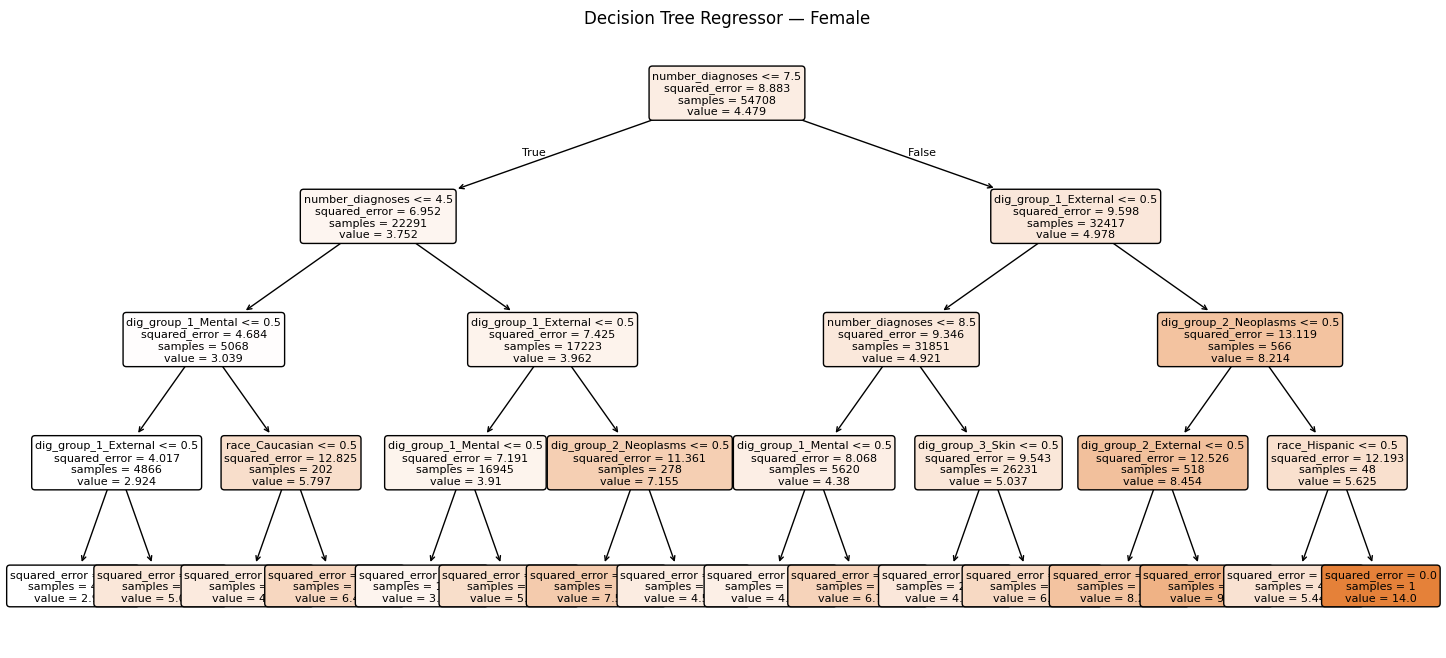

In [315]:
plt.figure(figsize=(18,8))
plot_tree(tree_female, feature_names=cols_female,
          filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Regressor — Female")
plt.show()

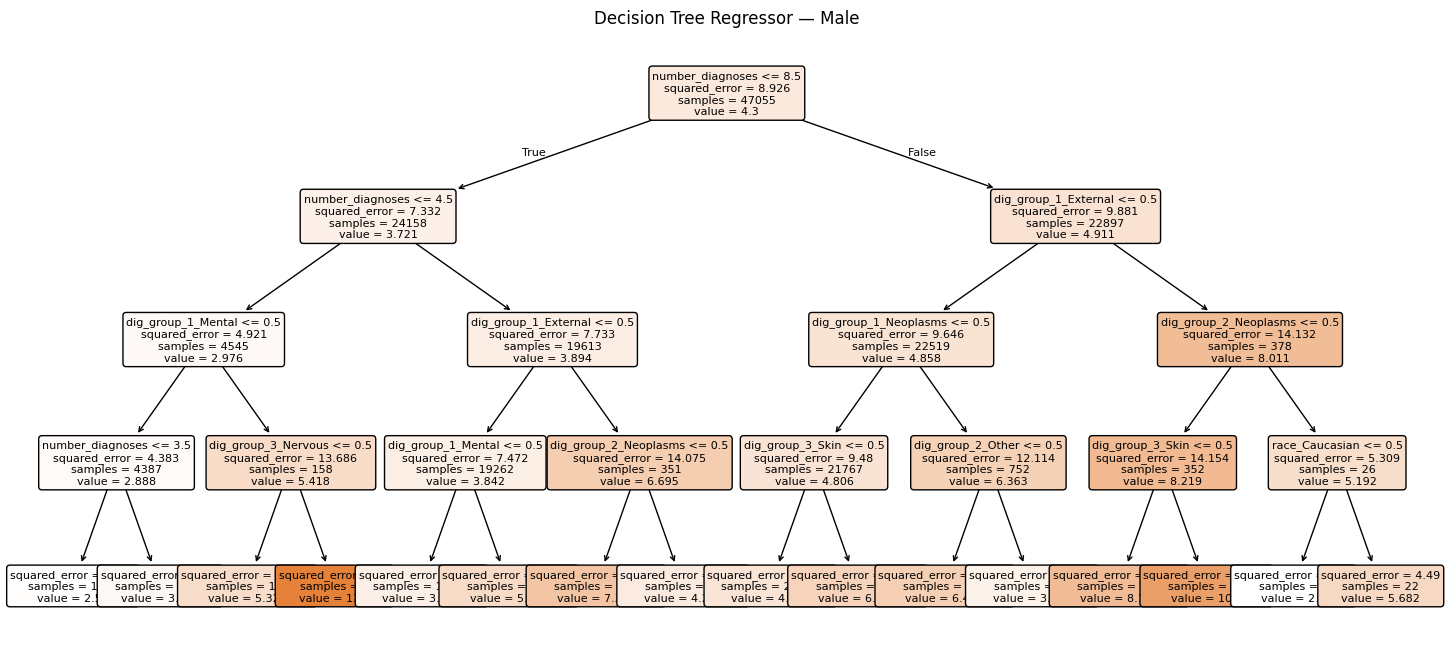

In [316]:

plt.figure(figsize=(18,8))
plot_tree(tree_male, feature_names=cols_male,
          filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Regressor — Male")
plt.show()

/tmp/ipython-input-419697592.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


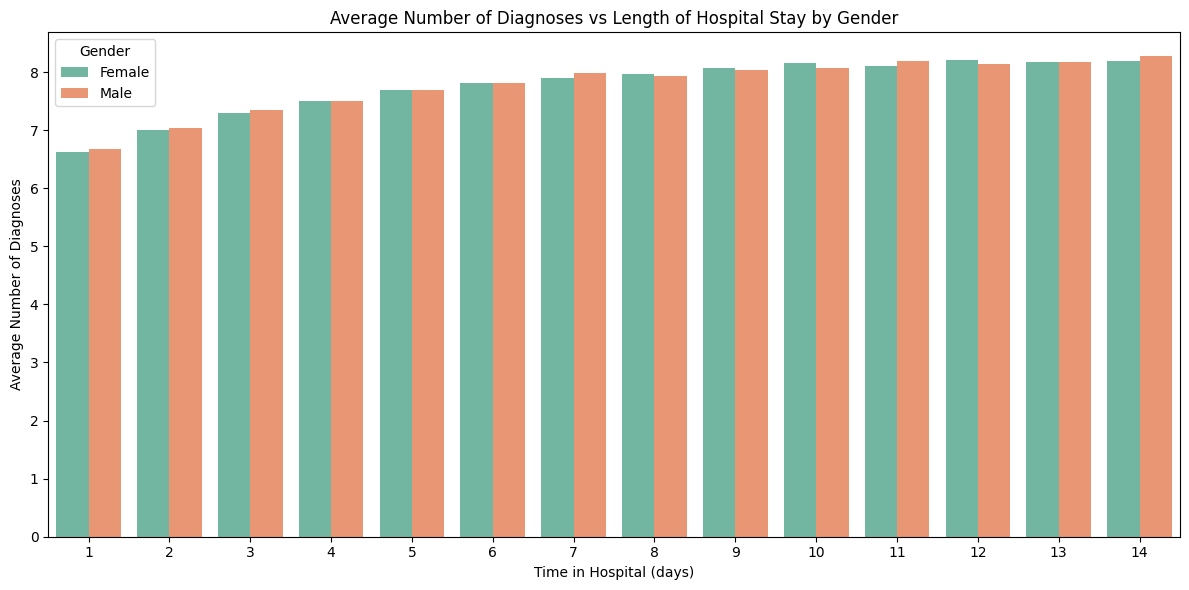

In [317]:

def decode_gender(row):
    if row.get('gender_Male', 0) == 1:
        return 'Male'
    elif row.get('gender_Unknown/Invalid', 0) == 1:
        return 'Unknown/Invalid'
    else:
        return 'Female'

df_encoded['gender'] = df_encoded.apply(decode_gender, axis=1)

plt.figure(figsize=(12,6))

# Bar plot showing average number of diagnoses per length of hospital stay, grouped by gender
sns.barplot(
    data=df_encoded,
    x='time_in_hospital',
    y='number_diagnoses',
    hue='gender',
    estimator='mean',   # computes the average
    ci=None,            # disables confidence interval
    palette='Set2'
)

plt.title("Average Number of Diagnoses vs Length of Hospital Stay by Gender")
plt.xlabel("Time in Hospital (days)")
plt.ylabel("Average Number of Diagnoses")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()



=== Processing AfricanAmerican ===

Mean Absolute Error (MAE) for AfricanAmerican: 2.27912980941964
Mean Squared Error (MSE) for AfricanAmerican: 8.490845078958245
Root Mean Squared Error (RMSE) for AfricanAmerican: 2.913905468432057
R-squared (R²) for AfricanAmerican: 0.08575885886435675

Top 20 Important Variables:
                       Variable  Importance
0              number_diagnoses    0.737015
20         dig_group_1_External    0.092960
24           dig_group_1_Mental    0.068933
70             dig_group_3_Skin    0.041979
26        dig_group_1_Neoplasms    0.031514
51             dig_group_2_Skin    0.005541
45        dig_group_2_Neoplasms    0.005398
49      dig_group_2_Respiratory    0.005368
10                  age_[60-70)    0.005342
63  dig_group_3_Musculoskeletal    0.004175
65          dig_group_3_Nervous    0.001775
6                   age_[20-30)    0.000000
5                   age_[10-20)    0.000000
4                    age_[0-10)    0.000000
3                   

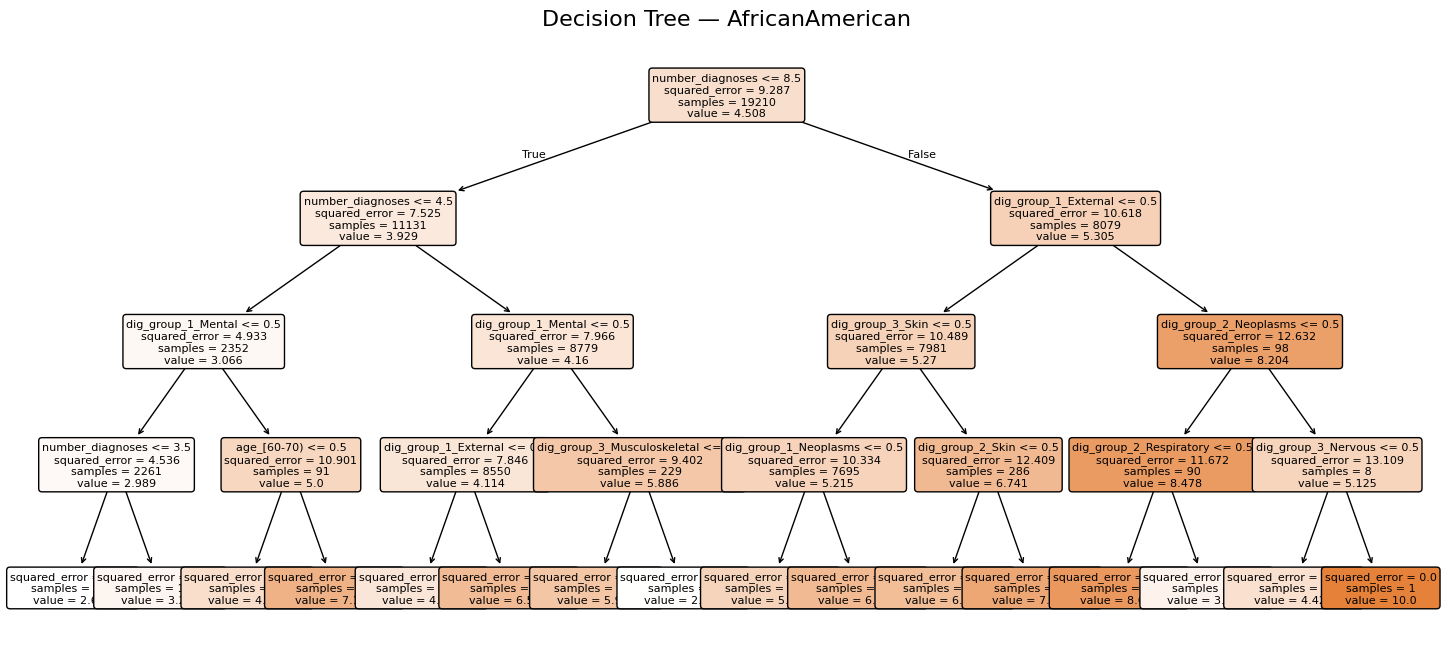

Created variable: tree_AfricanAmerican

=== Processing Asian ===

Mean Absolute Error (MAE) for Asian: 1.9928602151057884
Mean Squared Error (MSE) for Asian: 6.854823244871595
Root Mean Squared Error (RMSE) for Asian: 2.6181717370851736
R-squared (R²) for Asian: 0.20413822236750168

Top 20 Important Variables:
                     Variable  Importance
0            number_diagnoses    0.429485
40  dig_group_2_Genitourinary    0.102862
20       dig_group_1_External    0.100923
41     dig_group_2_Infectious    0.069355
49    dig_group_2_Respiratory    0.068275
9                 age_[50-60)    0.066791
23         dig_group_1_Injury    0.052172
53    dig_group_3_Circulatory    0.051980
24         dig_group_1_Mental    0.038638
58       dig_group_3_External    0.011978
3                 gender_Male    0.007098
42         dig_group_2_Injury    0.000444
6                 age_[20-30)    0.000000
4                  age_[0-10)    0.000000
2               gender_Female    0.000000
1               

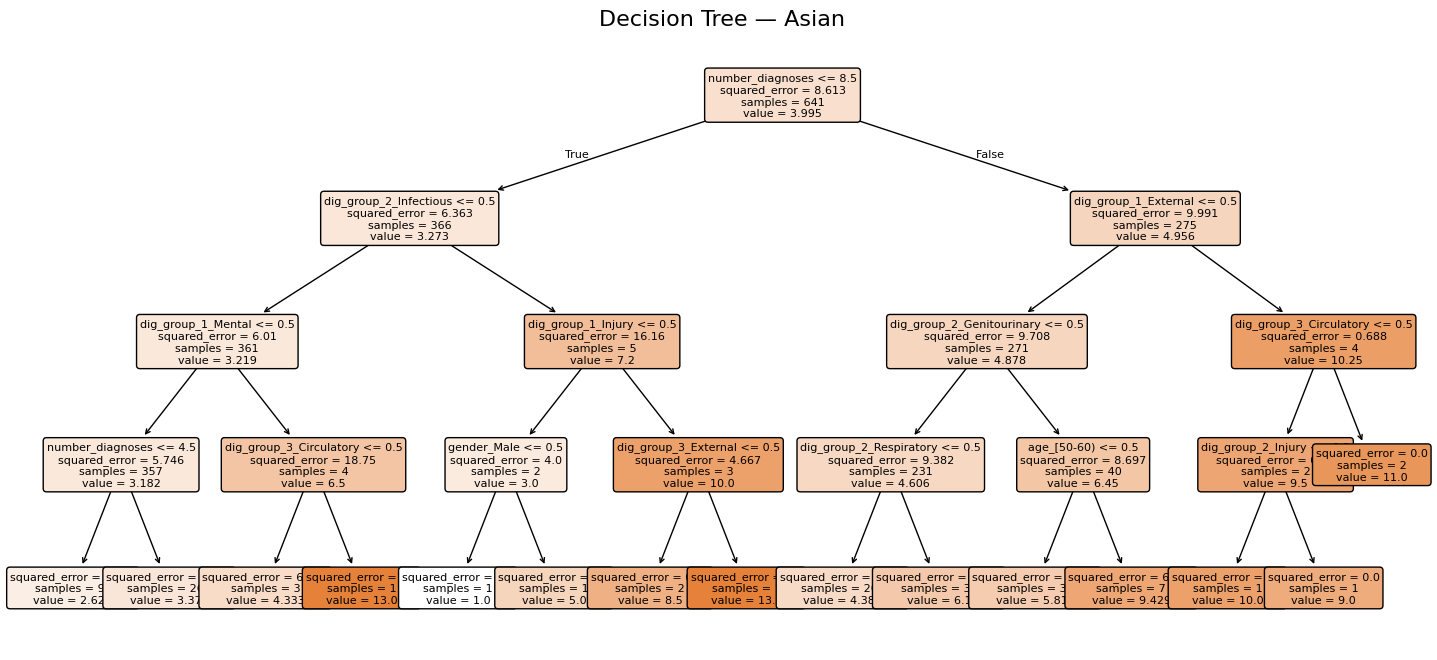

Created variable: tree_Asian

=== Processing Caucasian ===

Mean Absolute Error (MAE) for Caucasian: 2.2155021248561457
Mean Squared Error (MSE) for Caucasian: 8.107965048771474
Root Mean Squared Error (RMSE) for Caucasian: 2.847448866752742
R-squared (R²) for Caucasian: 0.0831879361428901

Top 20 Important Variables:
                     Variable  Importance
0            number_diagnoses    0.544748
20       dig_group_1_External    0.250958
24         dig_group_1_Mental    0.092511
26      dig_group_1_Neoplasms    0.042379
70           dig_group_3_Skin    0.038804
45      dig_group_2_Neoplasms    0.017979
12                age_[80-90)    0.004185
8                 age_[40-50)    0.002864
39       dig_group_2_External    0.002634
68    dig_group_3_Respiratory    0.001781
59  dig_group_3_Genitourinary    0.001158
5                 age_[10-20)    0.000000
6                 age_[20-30)    0.000000
2               gender_Female    0.000000
3                 gender_Male    0.000000
1       

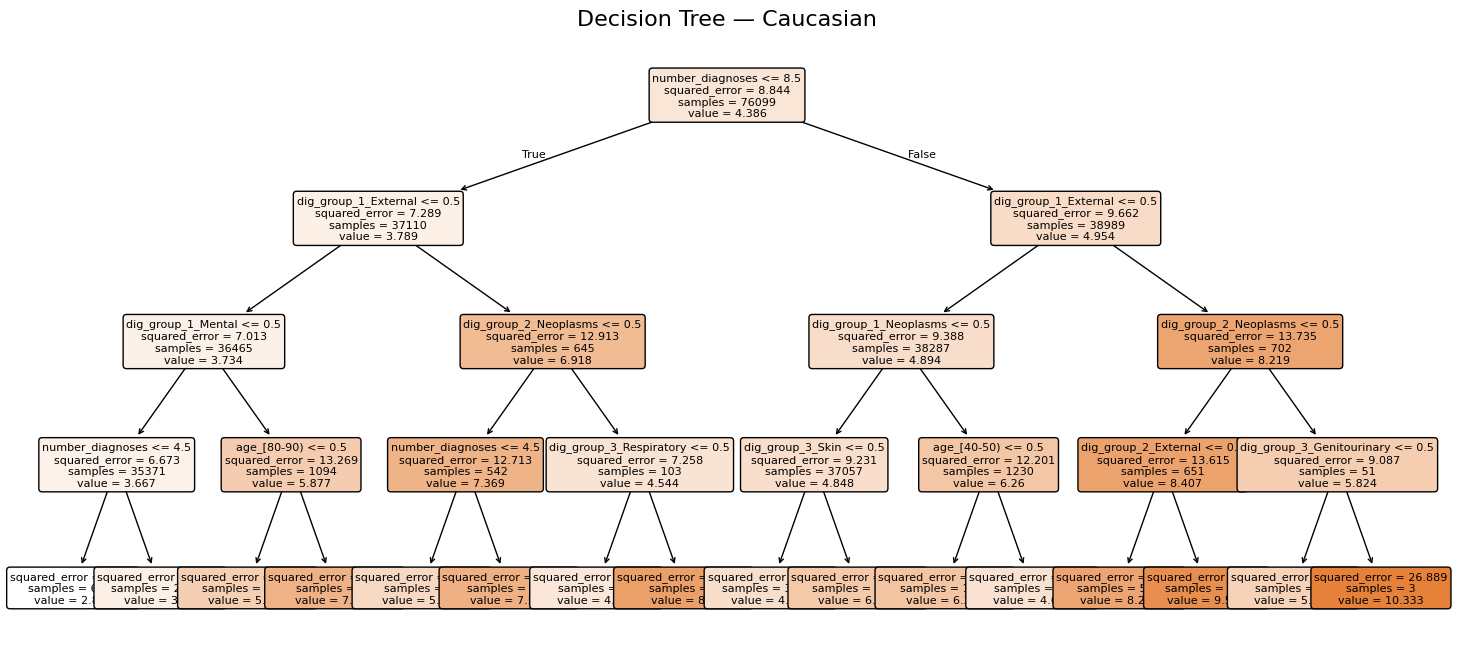

Created variable: tree_Caucasian

=== Processing Hispanic ===

Mean Absolute Error (MAE) for Hispanic: 2.044995011779177
Mean Squared Error (MSE) for Hispanic: 7.111172043213459
Root Mean Squared Error (RMSE) for Hispanic: 2.6666780914113835
R-squared (R²) for Hispanic: 0.10840579711257914

Top 20 Important Variables:
                       Variable  Importance
0              number_diagnoses    0.587637
20         dig_group_1_External    0.068029
63  dig_group_3_Musculoskeletal    0.064093
30      dig_group_1_Respiratory    0.060409
61           dig_group_3_Injury    0.058094
22       dig_group_1_Infectious    0.052207
59    dig_group_3_Genitourinary    0.033233
36         dig_group_2_Diabetes    0.030677
52            dig_group_3_Blood    0.021222
49      dig_group_2_Respiratory    0.010084
45        dig_group_2_Neoplasms    0.008796
10                  age_[60-70)    0.005520
5                   age_[10-20)    0.000000
4                    age_[0-10)    0.000000
3                   

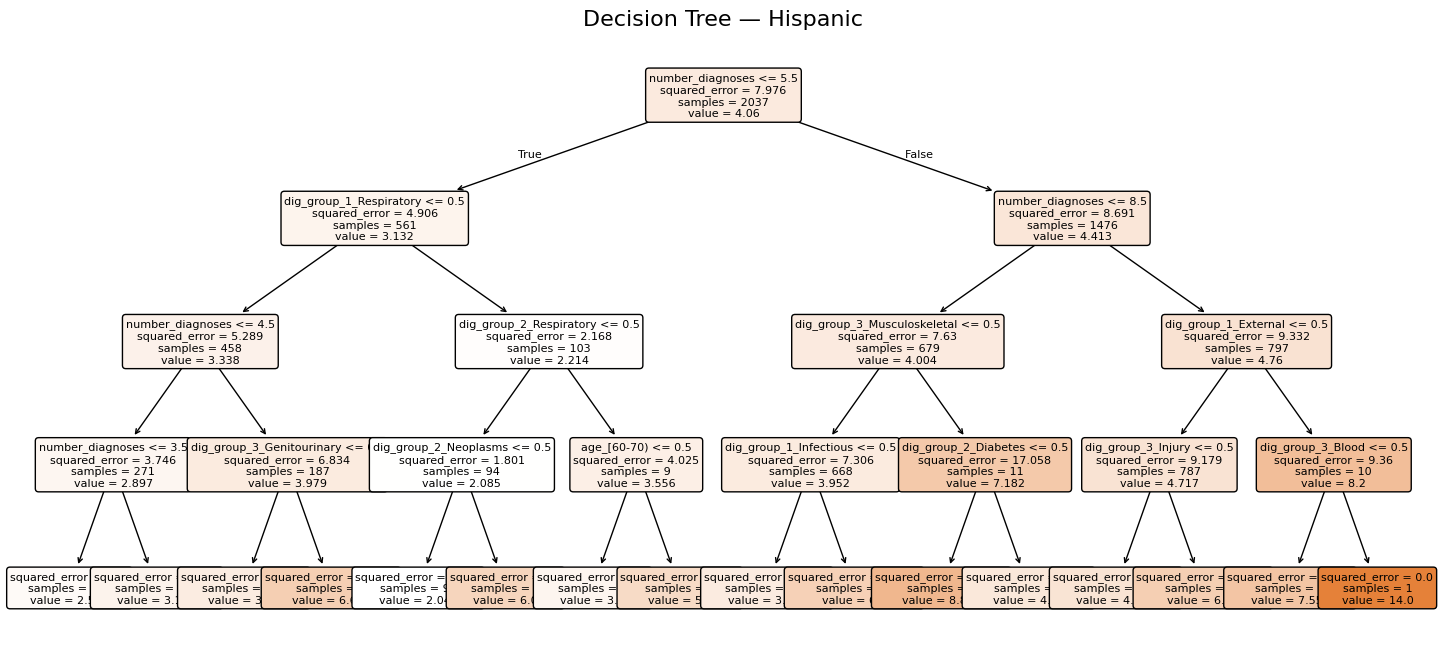

Created variable: tree_Hispanic

=== Processing Other ===

Mean Absolute Error (MAE) for Other: 2.2124108871381973
Mean Squared Error (MSE) for Other: 8.073926664461673
Root Mean Squared Error (RMSE) for Other: 2.8414655838953378
R-squared (R²) for Other: 0.12496288182309145

Top 20 Important Variables:
                             Variable  Importance
0                    number_diagnoses    0.465588
20               dig_group_1_External    0.124695
24                 dig_group_1_Mental    0.077789
26              dig_group_1_Neoplasms    0.049326
41             dig_group_2_Infectious    0.047661
57  dig_group_3_Endocrine_no_diabetes    0.043114
45              dig_group_2_Neoplasms    0.040579
34            dig_group_2_Circulatory    0.034672
62                 dig_group_3_Mental    0.034580
38  dig_group_2_Endocrine_no_diabetes    0.030042
55               dig_group_3_Diabetes    0.026698
15            dig_group_1_Circulatory    0.021797
58               dig_group_3_External    0.00

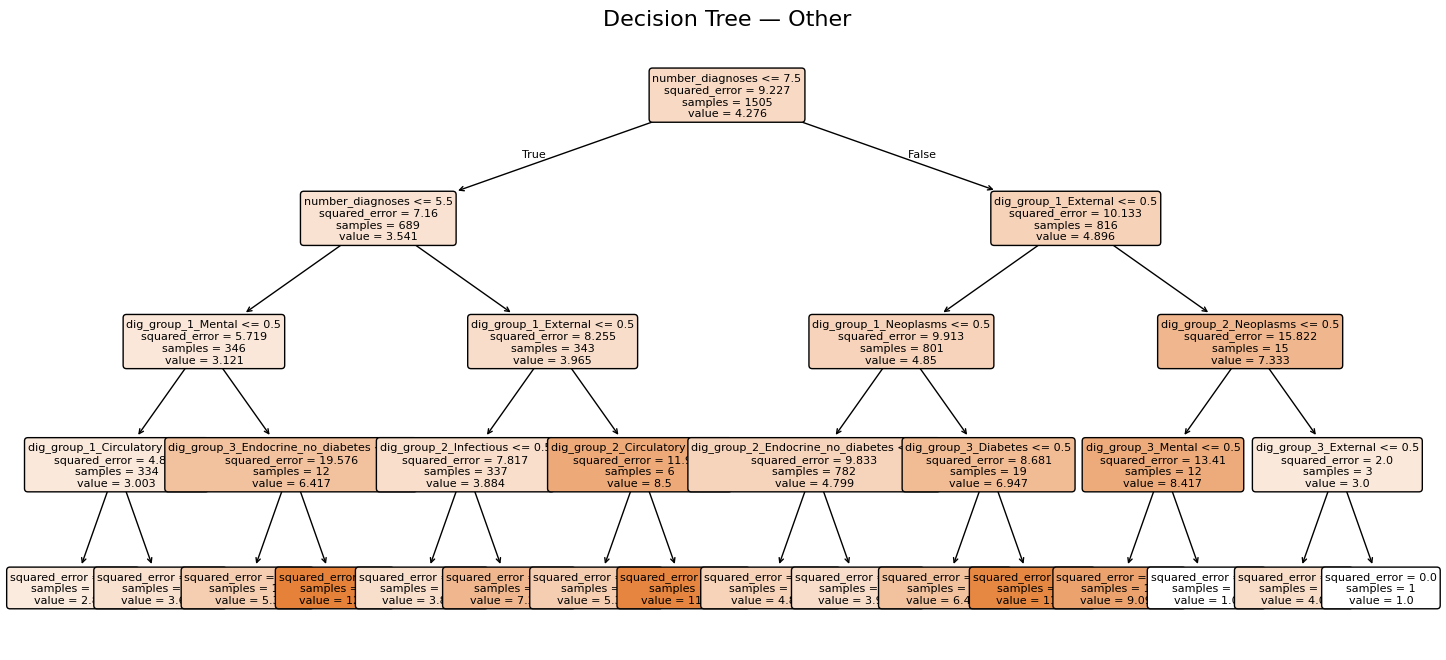

Created variable: tree_Other


In [318]:
race_columns = [
    'race_AfricanAmerican',
    'race_Asian',
    'race_Caucasian',
    'race_Hispanic',
    'race_Other'
]

def get_feature_importance(df, group_name):
    #always train the tree
    X = df.drop(['time_in_hospital'] + race_columns, axis=1, errors='ignore')
    y = df['time_in_hospital']

    tree = DecisionTreeRegressor(max_depth=4, random_state=42)
    tree.fit(X, y)

    importance = (
        pd.DataFrame({"Variable": X.columns, "Importance": tree.feature_importances_})
        .sort_values(by="Importance", ascending=False)
    )
    # Calculating Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, R2 to check how good the tree is
    mae = mean_absolute_error(y, tree.predict(X))
    mse = mean_squared_error(y, tree.predict(X))
    rmse = np.sqrt(mse)
    r2 = r2_score(y, tree.predict(X))
    print(f"\nMean Absolute Error (MAE) for {group_name}:", mae)
    print(f"Mean Squared Error (MSE) for {group_name}:", mse)
    print(f"Root Mean Squared Error (RMSE) for {group_name}:", rmse)
    print(f"R-squared (R²) for {group_name}:", r2)
    print("\nTop 20 Important Variables:")
    print(importance.head(20))
    # Print the tree
    print(f"\n Decision Tree for {group_name}")
    plt.figure(figsize=(18, 8))
    plot_tree(tree, feature_names=X.columns, filled=True, rounded=True, fontsize=8)
    plt.title(f"Decision Tree — {group_name}", fontsize=16)
    plt.show()

    return importance, tree


importance_results = {}
tree_race = {}

for col in race_columns:
    race_name = col.replace("race_", "")
    safe_name = race_name.replace(" ", "")   # just in case

    print(f"\n=== Processing {safe_name} ===")

    df_race = df_encoded_copy[df_encoded_copy[col] == 1]

    imp, tree_model = get_feature_importance(df_race, safe_name)

    importance_results[safe_name] = imp
    tree_race[safe_name] = tree_model

    # Always create variable
    globals()[f"tree_{safe_name}"] = tree_model
    print(f"Created variable: tree_{safe_name}")



=== Processing AfricanAmerican ===

 Results for AfricanAmerican
MAE: 2.27912980941964
MSE: 8.490845078958245
RMSE: 2.913905468432057
R²: 0.08575885886435675

Top 20 Important Variables:
                       Variable  Importance
0              number_diagnoses    0.737015
19         dig_group_1_External    0.092960
23           dig_group_1_Mental    0.068933
69             dig_group_3_Skin    0.041979
25        dig_group_1_Neoplasms    0.031514
50             dig_group_2_Skin    0.005541
44        dig_group_2_Neoplasms    0.005398
48      dig_group_2_Respiratory    0.005368
9                   age_[60-70)    0.005342
62  dig_group_3_Musculoskeletal    0.004175
64          dig_group_3_Nervous    0.001775
5                   age_[20-30)    0.000000
3                    age_[0-10)    0.000000
2                   gender_Male    0.000000
1                 gender_Female    0.000000
4                   age_[10-20)    0.000000
7                   age_[40-50)    0.000000
6                   

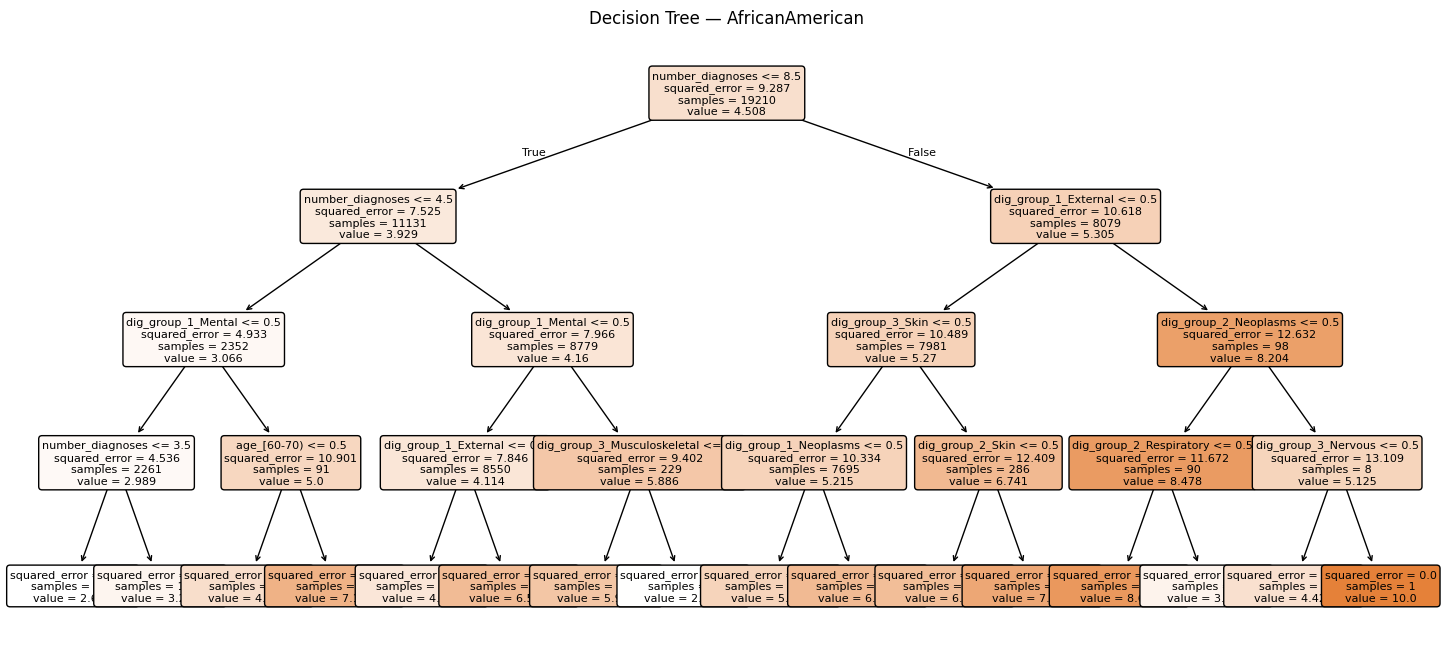

✔ Saved tree for AfricanAmerican as tree_race['AfricanAmerican']

=== Processing Asian ===

 Results for Asian
MAE: 1.9928602151057884
MSE: 6.854823244871595
RMSE: 2.6181717370851736
R²: 0.20413822236750168

Top 20 Important Variables:
                     Variable  Importance
0            number_diagnoses    0.429485
39  dig_group_2_Genitourinary    0.102862
19       dig_group_1_External    0.100923
40     dig_group_2_Infectious    0.069355
48    dig_group_2_Respiratory    0.068275
8                 age_[50-60)    0.066791
9                 age_[60-70)    0.061961
22         dig_group_1_Injury    0.052172
23         dig_group_1_Mental    0.038638
31           dig_group_1_Skin    0.007098
52    dig_group_3_Circulatory    0.001996
41         dig_group_2_Injury    0.000444
3                  age_[0-10)    0.000000
2                 gender_Male    0.000000
1               gender_Female    0.000000
4                 age_[10-20)    0.000000
7                 age_[40-50)    0.000000
6       

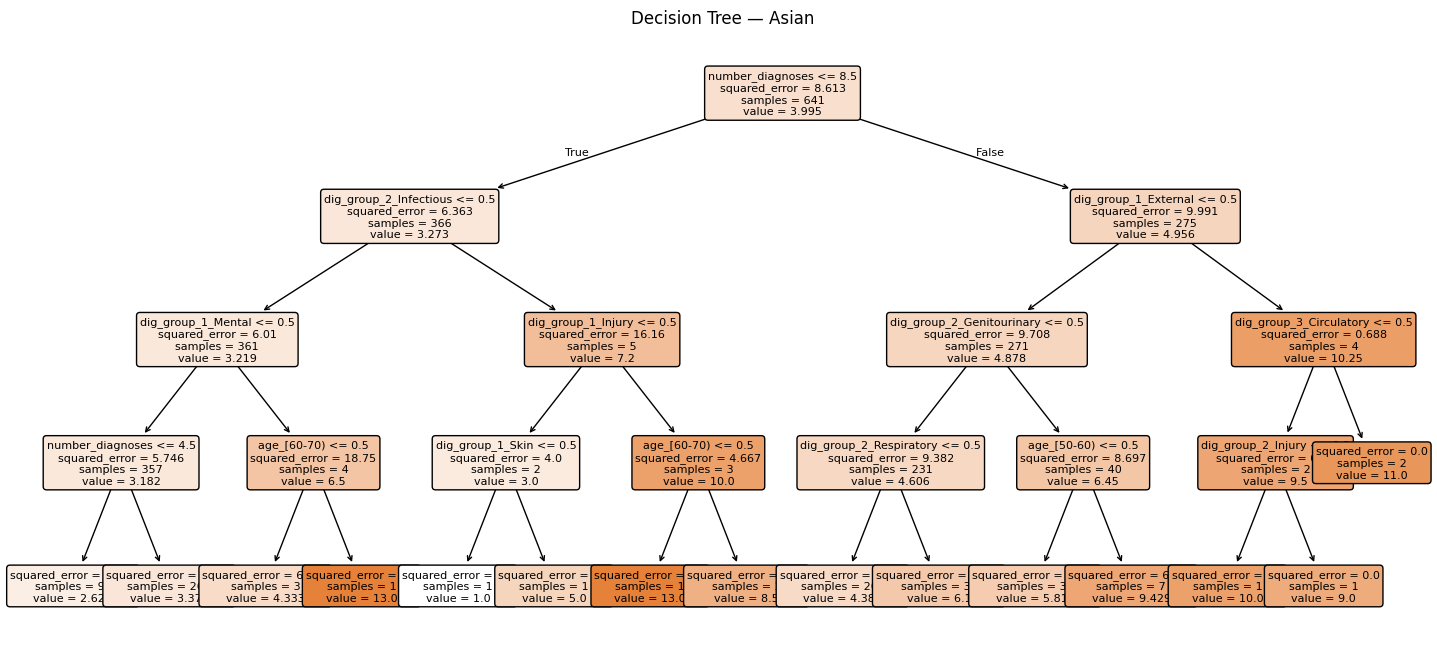

✔ Saved tree for Asian as tree_race['Asian']

=== Processing Caucasian ===

 Results for Caucasian
MAE: 2.2155021248561457
MSE: 8.107965048771474
RMSE: 2.847448866752742
R²: 0.0831879361428901

Top 20 Important Variables:
                     Variable  Importance
0            number_diagnoses    0.544748
19       dig_group_1_External    0.250958
23         dig_group_1_Mental    0.092511
25      dig_group_1_Neoplasms    0.042379
69           dig_group_3_Skin    0.038804
44      dig_group_2_Neoplasms    0.017979
11                age_[80-90)    0.004185
7                 age_[40-50)    0.002864
38       dig_group_2_External    0.002634
67    dig_group_3_Respiratory    0.001781
58  dig_group_3_Genitourinary    0.001158
5                 age_[20-30)    0.000000
1               gender_Female    0.000000
2                 gender_Male    0.000000
4                 age_[10-20)    0.000000
3                  age_[0-10)    0.000000
6                 age_[30-40)    0.000000
14    dig_group_1_Circ

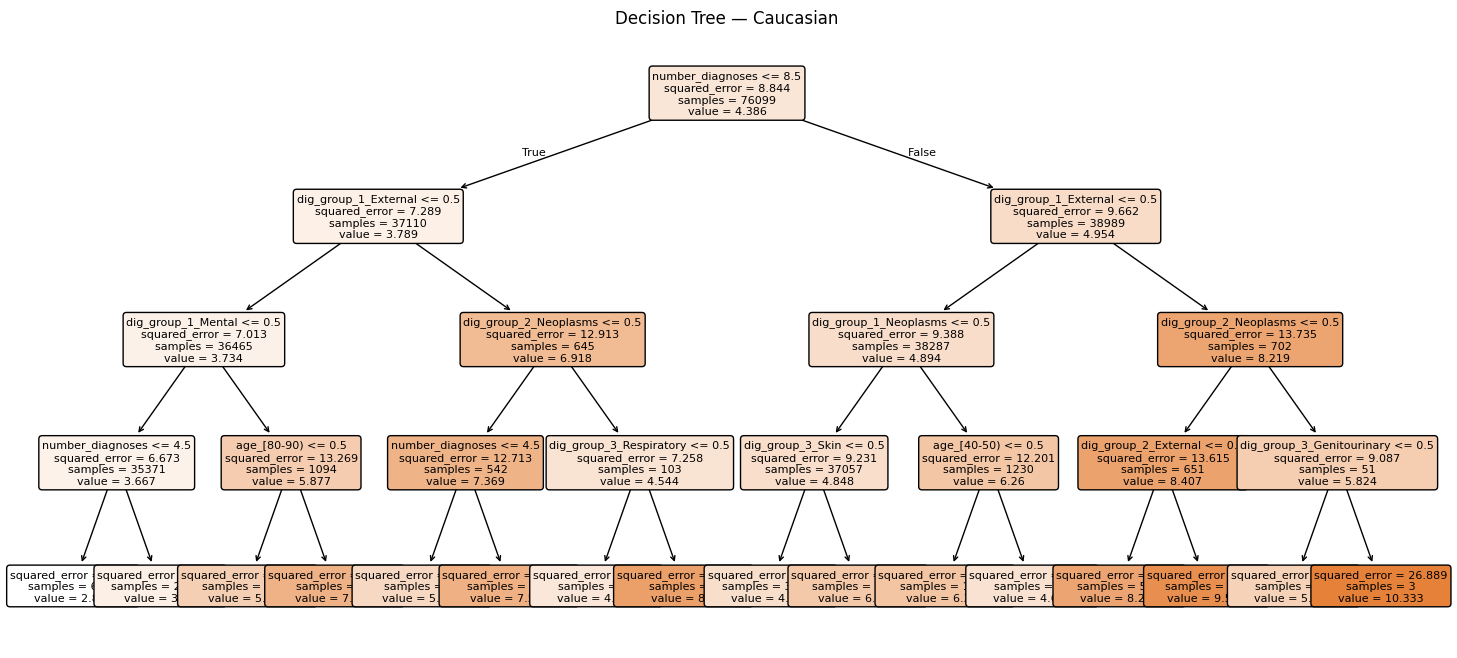

✔ Saved tree for Caucasian as tree_race['Caucasian']

=== Processing Hispanic ===

 Results for Hispanic
MAE: 2.044995011779177
MSE: 7.111172043213459
RMSE: 2.6666780914113835
R²: 0.10840579711257914

Top 20 Important Variables:
                       Variable  Importance
0              number_diagnoses    0.587637
19         dig_group_1_External    0.068029
62  dig_group_3_Musculoskeletal    0.064093
29      dig_group_1_Respiratory    0.060409
60           dig_group_3_Injury    0.058094
21       dig_group_1_Infectious    0.052207
58    dig_group_3_Genitourinary    0.033233
35         dig_group_2_Diabetes    0.030677
51            dig_group_3_Blood    0.021222
48      dig_group_2_Respiratory    0.010084
44        dig_group_2_Neoplasms    0.008796
9                   age_[60-70)    0.005520
3                    age_[0-10)    0.000000
2                   gender_Male    0.000000
1                 gender_Female    0.000000
4                   age_[10-20)    0.000000
7                   age

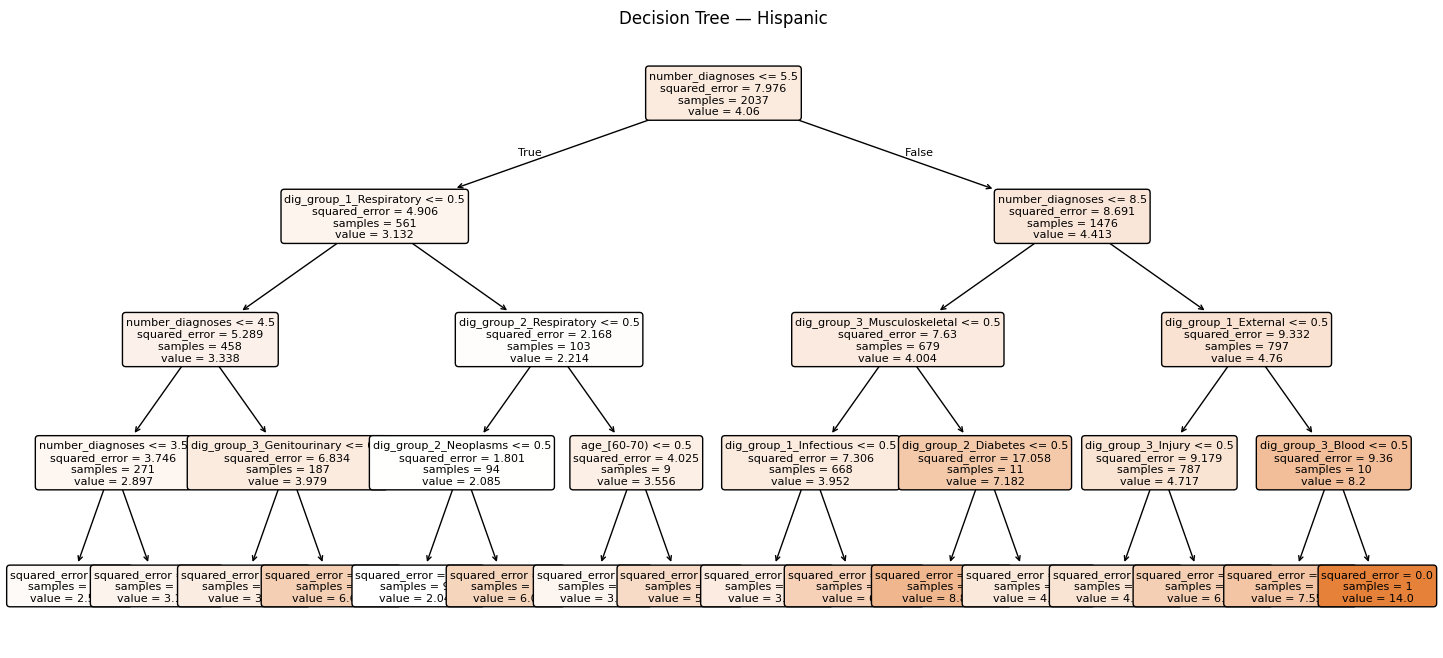

✔ Saved tree for Hispanic as tree_race['Hispanic']

=== Processing Other ===

 Results for Other
MAE: 2.2124108871381973
MSE: 8.073926664461673
RMSE: 2.8414655838953378
R²: 0.12496288182309145

Top 20 Important Variables:
                             Variable  Importance
0                    number_diagnoses    0.465588
19               dig_group_1_External    0.124695
23                 dig_group_1_Mental    0.077789
25              dig_group_1_Neoplasms    0.049326
40             dig_group_2_Infectious    0.047661
56  dig_group_3_Endocrine_no_diabetes    0.043114
44              dig_group_2_Neoplasms    0.040579
33            dig_group_2_Circulatory    0.034672
61                 dig_group_3_Mental    0.034580
37  dig_group_2_Endocrine_no_diabetes    0.030042
54               dig_group_3_Diabetes    0.026698
14            dig_group_1_Circulatory    0.021797
9                         age_[60-70)    0.003458
3                          age_[0-10)    0.000000
1                       gend

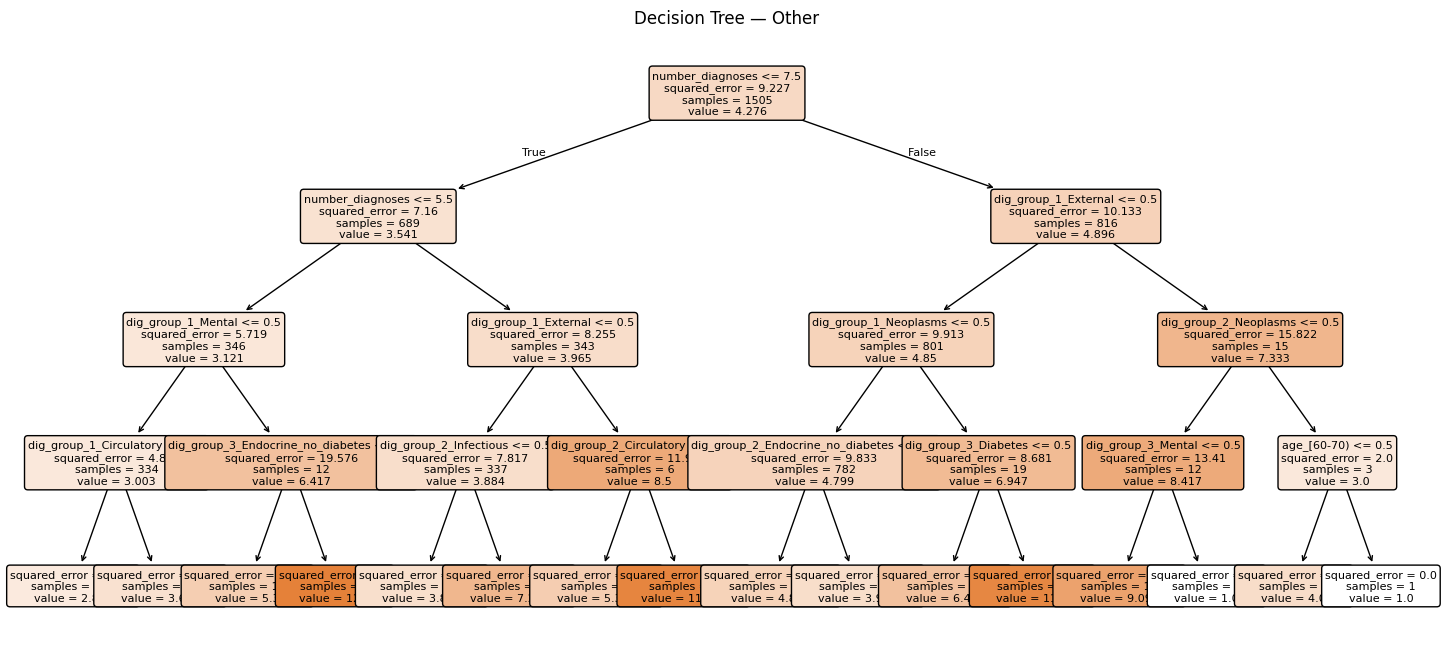

✔ Saved tree for Other as tree_race['Other']

=== Processing ? ===

 Results for ?
MAE: 2.125357066384301
MSE: 7.5672483723964605
RMSE: 2.750863204958847
R²: 0.09991703391765994

Top 20 Important Variables:
                   Variable  Importance
0          number_diagnoses    0.566018
19     dig_group_1_External    0.143004
50         dig_group_2_Skin    0.106142
23       dig_group_1_Mental    0.083327
9               age_[60-70)    0.028885
65        dig_group_3_Other    0.022953
57     dig_group_3_External    0.021824
51        dig_group_3_Blood    0.015483
1             gender_Female    0.009380
14  dig_group_1_Circulatory    0.002985
7               age_[40-50)    0.000000
6               age_[30-40)    0.000000
3                age_[0-10)    0.000000
2               gender_Male    0.000000
5               age_[20-30)    0.000000
4               age_[10-20)    0.000000
15   dig_group_1_Congenital    0.000000
13        dig_group_1_Blood    0.000000
17    dig_group_1_Digestive    0.

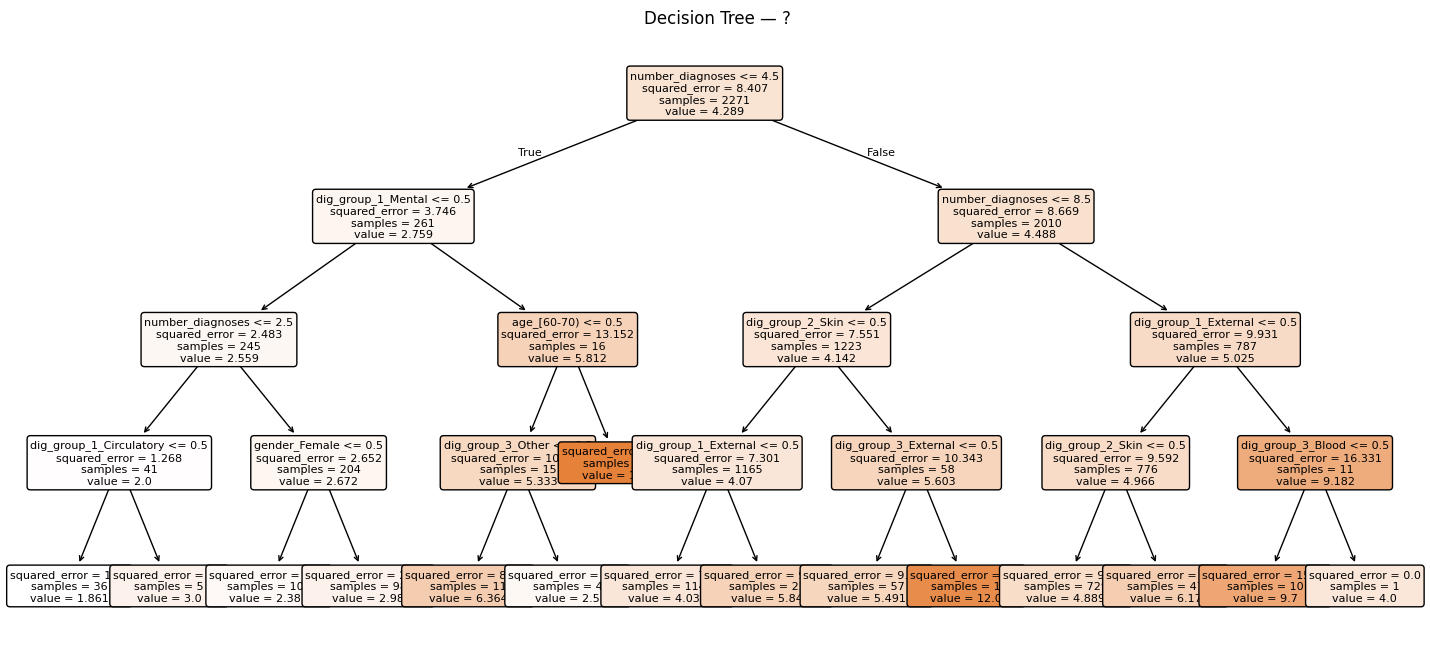

✔ Saved tree for ? as tree_race['?']


In [319]:
race_columns = [
    'race_AfricanAmerican',
    'race_Asian',
    'race_Caucasian',
    'race_Hispanic',
    'race_Other',
    'race_?'
]

def get_feature_importance(df, group_name):
    # Make sure enough data exists
    if df.shape[0] < 50:
        print(f"⚠️ Skipping {group_name} — too few records ({df.shape[0]})")
        return None, None

    # Split X and y
    X = df.drop(['time_in_hospital'] + race_columns, axis=1, errors='ignore')
    y = df['time_in_hospital']

    # Train tree
    tree = DecisionTreeRegressor(max_depth=4, random_state=42)
    tree.fit(X, y)

    # Feature importance
    importance = (
        pd.DataFrame({"Variable": X.columns, "Importance": tree.feature_importances_})
        .sort_values(by="Importance", ascending=False)
    )

    # Metrics
    preds = tree.predict(X)
    mae = mean_absolute_error(y, preds)
    mse = mean_squared_error(y, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, preds)

    print(f"\n Results for {group_name}")
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R²:", r2)

    print("\nTop 20 Important Variables:")
    print(importance.head(20))
    # Plot tree
    plt.figure(figsize=(18, 8))
    plot_tree(tree, feature_names=X.columns, filled=True, rounded=True, fontsize=8)
    plt.title(f"Decision Tree — {group_name}")
    plt.show()

    return importance, tree


# --- Train a tree per race group ---
importance_results = {}
tree_race = {}     # <--- This dictionary stores models for later

for col in race_columns:
    race_name = col.replace("race_", "")  # e.g., AfricanAmerican
    safe_name = race_name.replace(" ", "")

    print(f"\n=== Processing {safe_name} ===")

    # Filter dataset for specific race
    df_race = df_encoded_copy[df_encoded_copy[col] == 1]

    # Train tree
    imp, model = get_feature_importance(df_race, safe_name)

    # Save in dictionaries
    importance_results[safe_name] = imp
    tree_race[safe_name] = model

    if model is not None:
        print(f"✔ Saved tree for {safe_name} as tree_race['{safe_name}']")
    else:
        print(f"⚠️ Skipped tree creation for {safe_name}")


In [320]:
# Train mortality classifier
mort_model = RandomForestClassifier(n_estimators=100, random_state=42)
mort_model.fit(X.drop(columns=['mortality_died']), df_encoded['mortality_died'])

# Add predicted mortality probability as a feature
mort_prob_train = mort_model.predict_proba(X.drop(columns=['mortality_died']))[:,1]
X['mortality_prob'] = mort_prob_train

# Retrain LOS tree
model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(X, y)


DecisionTreeRegressor(max_depth=4, random_state=42)

In [321]:
age_columns = [
    'age_[0-10)', 'age_[10-20)', 'age_[20-30)', 'age_[30-40)',
    'age_[40-50)', 'age_[50-60)', 'age_[60-70)', 'age_[70-80)',
    'age_[80-90)', 'age_[90-100)'
]

race_columns = [
    'race_AfricanAmerican', 'race_Asian', 'race_Caucasian',
    'race_Hispanic', 'race_Other'
]
diagnoses_list = [
    "Circulatory","Respiratory","Digestive","Diabetes","Injury",
    "Musculoskeletal","Genitourinary","Neoplasms","Other","Infectious",
    "Endocrine_no_diabetes","Skin","Mental","External","Blood","Nervous",
    "Pregnancy","Sense_organs","Congenital"
]

In [322]:
def predict_length_of_stay(race, gender, age, diag_1_group, diag_2_group, diag_3_group, num_diagnoses):
    """
    Predicts hospital length of stay based on patient characteristics
    """
    try:
        # Create a base row with all False/0 values matching your encoded dataframe structure
        input_data = pd.DataFrame(0, index=[0], columns=df_encoded_copy_prediction.columns)

        # Set the numerical features
        input_data['time_in_hospital'] = 0  # This will be predicted
        input_data['number_diagnoses'] = num_diagnoses

        # Set race (one-hot encoding)
        race_column = f'race_{race}'
        if race_column in input_data.columns:
            input_data[race_column] = 1
        else:
            # Fallback to 'Other' if race not found
            input_data['race_Other'] = 1

        # Set gender (one-hot encoding)
        gender_column = f'gender_{gender}'
        if gender_column in input_data.columns:
            input_data[gender_column] = 1

        # Set age (one-hot encoding)
        age_column = f'age_{age}'
        if age_column in input_data.columns:
            input_data[age_column] = 1

        # Set diagnosis groups (one-hot encoding)
        diag1_column = f'dig_group_1_{diag_1_group}'
        diag2_column = f'dig_group_2_{diag_2_group}'
        diag3_column = f'dig_group_3_{diag_3_group}'

        if diag1_column in input_data.columns:
            input_data[diag1_column] = 1
        if diag2_column in input_data.columns:
            input_data[diag2_column] = 1
        if diag3_column in input_data.columns:
            input_data[diag3_column] = 1

        # Drop target variables from input features
        features = input_data.drop(['time_in_hospital', 'mortality_died', 'mortality_lived'], axis=1)

        # Predict length of stay using your survived model
        length_of_stay_pred = tree_survived.predict(features)[0]

        # Format the output
        if length_of_stay_pred < 1:
            return f"Less than 1 day"
        elif length_of_stay_pred == 1:
            return f"1 day"
        else:
            return f"{length_of_stay_pred:.1f} days"

    except Exception as e:
        return f"Error predicting length of stay: {str(e)}"


In [324]:
def predict_mortality(race, gender, age, diag_1_group, diag_2_group, diag_3_group, num_diagnoses):
    """
    Predicts mortality probability based on patient characteristics
    """
    try:
        # Create a base row with all False/0 values matching your encoded dataframe structure
        input_data = pd.DataFrame(0, index=[0], columns=df_encoded_copy_prediction.columns)

        # Set the numerical features
        input_data['time_in_hospital'] = 0
        input_data['number_diagnoses'] = num_diagnoses

        # Set race (one-hot encoding)
        race_column = f'race_{race}'
        if race_column in input_data.columns:
            input_data[race_column] = 1
        else:
            # Fallback to 'Other' if race not found
            input_data['race_Other'] = 1

        # Set gender (one-hot encoding)
        gender_column = f'gender_{gender}'
        if gender_column in input_data.columns:
            input_data[gender_column] = 1

        # Set age (one-hot encoding)
        age_column = f'age_{age}'
        if age_column in input_data.columns:
            input_data[age_column] = 1

        # Set diagnosis groups (one-hot encoding)
        diag1_column = f'dig_group_1_{diag_1_group}'
        diag2_column = f'dig_group_2_{diag_2_group}'
        diag3_column = f'dig_group_3_{diag_3_group}'

        if diag1_column in input_data.columns:
            input_data[diag1_column] = 1
        if diag2_column in input_data.columns:
            input_data[diag2_column] = 1
        if diag3_column in input_data.columns:
            input_data[diag3_column] = 1

        # Drop target variables from input features
        features = input_data.drop(['time_in_hospital', 'mortality_died'], axis=1)

        # Predict mortality probability using your mortality model
        mortality_prob = mort_model.predict_proba(features)[0]

        # Determine which class represents "died" (usually class 1)
        # If your model was trained on 'mortality_died' as target, class 1 = died
        mortality_probability = mortality_prob[1]  # Probability of dying

        # Format the output with risk categorization
        risk_level = ""
        if mortality_probability < 0.05:
            risk_level = " (Very Low Risk)"
        elif mortality_probability < 0.1:
            risk_level = " (Low Risk)"
        elif mortality_probability < 0.2:
            risk_level = " (Moderate Risk)"
        elif mortality_probability < 0.4:
            risk_level = " (High Risk)"
        else:
            risk_level = " (Very High Risk)"

        return f"{mortality_probability*100:.2f}%{risk_level}"

    except Exception as e:
        return f"Error predicting mortality: {str(e)}"

In [325]:
# Your complete diagnosis list
diagnoses_list = [
    "Circulatory", "Respiratory", "Digestive", "Diabetes", "Injury",
    "Musculoskeletal", "Genitourinary", "Neoplasms", "Other", "Infectious",
    "Endocrine_no_diabetes", "Skin", "Mental", "External", "Blood", "Nervous",
    "Pregnancy", "Sense_organs", "Congenital"
]

# Create a tabbed interface
with gr.Blocks(title="Hospital Patient Predictions") as demo:
    gr.Markdown("# 🏥 Hospital Patient Outcome Predictions")
    gr.Markdown("Predict patient outcomes based on demographic and diagnostic information")

    with gr.Tab("📅 Length of Stay Prediction"):
        gr.Markdown("## Predict Hospital Length of Stay")
        gr.Markdown("Estimate how long a patient will remain in the hospital")

        with gr.Row():
            with gr.Column():
                race_input = gr.Dropdown(["AfricanAmerican", "Asian", "Caucasian", "Hispanic", "Other"],
                                       label="Race", value="Caucasian")
                gender_input = gr.Dropdown(["Female", "Male"], label="Gender", value="Female")
                age_input = gr.Dropdown(["[0-10)", "[10-20)", "[20-30)", "[30-40)", "[40-50)",
                                       "[50-60)", "[60-70)", "[70-80)", "[80-90)", "[90-100)"],
                                      label="Age Group", value="[50-60)")

            with gr.Column():
                diag1_input = gr.Dropdown(diagnoses_list,
                                        label="Primary Diagnosis", value="Circulatory")
                diag2_input = gr.Dropdown(diagnoses_list,
                                        label="Secondary Diagnosis", value="Diabetes")
                diag3_input = gr.Dropdown(diagnoses_list,
                                        label="Tertiary Diagnosis", value="Other")
                num_diag_input = gr.Slider(1, 16, value=5, step=1,
                                         label="Number of Diagnoses",
                                         info="Total number of diagnoses recorded (1-16)")

        stay_button = gr.Button("🔮 Predict Length of Stay", variant="primary")
        stay_output = gr.Textbox(label="Predicted Length of Stay", interactive=False)

        stay_button.click(
            fn=predict_length_of_stay,
            inputs=[race_input, gender_input, age_input, diag1_input, diag2_input, diag3_input, num_diag_input],
            outputs=stay_output
        )

    with gr.Tab("⚠️ Mortality Risk Prediction"):
        gr.Markdown("## Predict Patient Mortality Risk")
        gr.Markdown("Assess the probability of patient mortality during hospitalization")

        with gr.Row():
            with gr.Column():
                race_input2 = gr.Dropdown(["AfricanAmerican", "Asian", "Caucasian", "Hispanic", "Other"],
                                        label="Race", value="Caucasian")
                gender_input2 = gr.Dropdown(["Female", "Male"], label="Gender", value="Female")
                age_input2 = gr.Dropdown(["[0-10)", "[10-20)", "[20-30)", "[30-40)", "[40-50)",
                                        "[50-60)", "[60-70)", "[70-80)", "[80-90)", "[90-100)"],
                                       label="Age Group", value="[70-80)")

            with gr.Column():
                diag1_input2 = gr.Dropdown(diagnoses_list,
                                         label="Primary Diagnosis", value="Circulatory")
                diag2_input2 = gr.Dropdown(diagnoses_list,
                                         label="Secondary Diagnosis", value="Diabetes")
                diag3_input2 = gr.Dropdown(diagnoses_list,
                                         label="Tertiary Diagnosis", value="Other")
                num_diag_input2 = gr.Slider(1, 16, value=5, step=1,
                                          label="Number of Diagnoses",
                                          info="Total number of diagnoses recorded (1-16)")

        mortality_button = gr.Button("🔮 Predict Mortality Risk", variant="primary")
        mortality_output = gr.Textbox(label="Predicted Mortality Probability", interactive=False)

        mortality_button.click(
            fn=predict_mortality,
            inputs=[race_input2, gender_input2, age_input2, diag1_input2, diag2_input2, diag3_input2, num_diag_input2],
            outputs=mortality_output
        )

    # Optional: Add some examples
    with gr.Tab("📋 Example Cases"):
        gr.Markdown("## Example Patient Cases")
        gr.Markdown("""
        **Example 1 - Low Risk:**
        - Race: Caucasian
        - Gender: Female
        - Age: [50-60)
        - Primary: Diabetes
        - Secondary: Other
        - Tertiary: Other
        - Diagnoses: 3

        **Example 2 - High Risk:**
        - Race: Caucasian
        - Gender: Male
        - Age: [70-80)
        - Primary: Circulatory
        - Secondary: Diabetes
        - Tertiary: Respiratory
        - Diagnoses: 8

        **Example 3 - Young Patient:**
        - Race: AfricanAmerican
        - Gender: Male
        - Age: [20-30)
        - Primary: Injury
        - Secondary: Musculoskeletal
        - Tertiary: Other
        - Diagnoses: 2
        """)

# Launch the interface
demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://346010c15a2ccb1804.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
